# Analyse exploratoire

**Problématique de la ville de Seattle**  
Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

**Votre mission**  
Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées). 

Faire bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mettre en place une évaluation rigoureuse des performances de la régression, et optimiser les hyperparamètres et le choix d’algorithme de ML à l’aide d’une validation croisée.

**Livrables attendus**  
- Un notebook de l'analyse exploratoire mis au propre et annoté.
- Le code (ou un notebook) des différents tests de modèles mis au propre, dans lequel vous identifierez clairement le modèle final choisi.
- Un support de présentation pour la soutenance.

**Compétences évaluées**  
- Mettre en place le modèle d'apprentissage supervisé adapté au problème métier
- Évaluer les performances d’un modèle d'apprentissage supervisé
- Adapter les hyperparamètres d'un algorithme d'apprentissage supervisé afin de l'améliorer
- Transformer les variables pertinentes d'un modèle d'apprentissage supervisé

# Sommaire

__[I. Chargement et nettoyage des données](#I.-Chargement-et-nettoyage-des-données)__\
[I.1 Descriptions des indicateurs](#I.1-Descriptions-des-indicateurs)\
[I.2 Sélection des variables](#I.2-Sélection-des-variables)

__[II. Analyse exploratoire](#II.-Analyse-exploratoire)__\
[II.1 Variables qualitatives et variables quantitatives](#II.1-Variables-qualitatives-et-variables-quantitatives)\
[II.2 Variables quantitatives](#II.2-Variables-quantitatives)\
[II.2.1 Distribution des variables quantitatives](#II.2.1-Distribution-des-variables-quantitatives)\
[II.2.2 outliers](#II.2.2-outliers)\
[II.2.3 Transformation des variables cibles](#II.2.3-Transformation-des-variables-cibles)\
[II.2.4 Etude des corrélations](#II.2.4-Etude-des-corrélations)\
[II.2.4.i Variables cibles](#II.2.4.i-Variables-cibles)\
[II.2.4.ii Prédicteurs](#II.2.4.ii-Prédicteurs)\
[II.3 Variables catégorielles](#II.3-Variables-catégorielles)\
[II.3.1 Nettoyage des variables catégorielles](#II.3.1-Nettoyage-des-variables-catégorielles)\
[II.3.2 Etude des corrélations](#II.3.2-Etude-des-corrélations)

__[A suivre: Latitude, Longitude](#A-suivre:-Latitude,-Longitude)__

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# I. Chargement et nettoyage des données

## I.1 Descriptions des indicateurs

1er dataset: 2015-building-energy-benchmarking.csv

In [107]:
data2015 = pd.read_csv("./data/2015-building-energy-benchmarking.csv")
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [108]:
indicators = pd.Series(data2015.columns, name="indicators")
indicators

0                                         OSEBuildingID
1                                              DataYear
2                                          BuildingType
3                                   PrimaryPropertyType
4                                          PropertyName
5                         TaxParcelIdentificationNumber
6                                              Location
7                                   CouncilDistrictCode
8                                          Neighborhood
9                                             YearBuilt
10                                    NumberofBuildings
11                                       NumberofFloors
12                                     PropertyGFATotal
13                                   PropertyGFAParking
14                               PropertyGFABuilding(s)
15                            ListOfAllPropertyUseTypes
16                               LargestPropertyUseType
17                            LargestPropertyUse

2eme dataset: 2016-building-energy-benchmarking

In [109]:
data2016 = pd.read_csv("./data/2016-building-energy-benchmarking.csv")
indicators_2016 = pd.Series(data2016.columns, name="indicators_2016")
indicators_2016

0                       OSEBuildingID
1                            DataYear
2                        BuildingType
3                 PrimaryPropertyType
4                        PropertyName
5                             Address
6                                City
7                               State
8                             ZipCode
9       TaxParcelIdentificationNumber
10                CouncilDistrictCode
11                       Neighborhood
12                           Latitude
13                          Longitude
14                          YearBuilt
15                  NumberofBuildings
16                     NumberofFloors
17                   PropertyGFATotal
18                 PropertyGFAParking
19             PropertyGFABuilding(s)
20          ListOfAllPropertyUseTypes
21             LargestPropertyUseType
22          LargestPropertyUseTypeGFA
23       SecondLargestPropertyUseType
24    SecondLargestPropertyUseTypeGFA
25        ThirdLargestPropertyUseType
26     Third

Indicateurs qui ne sont pas en commun entre les deux datasets?

<AxesSubplot:>

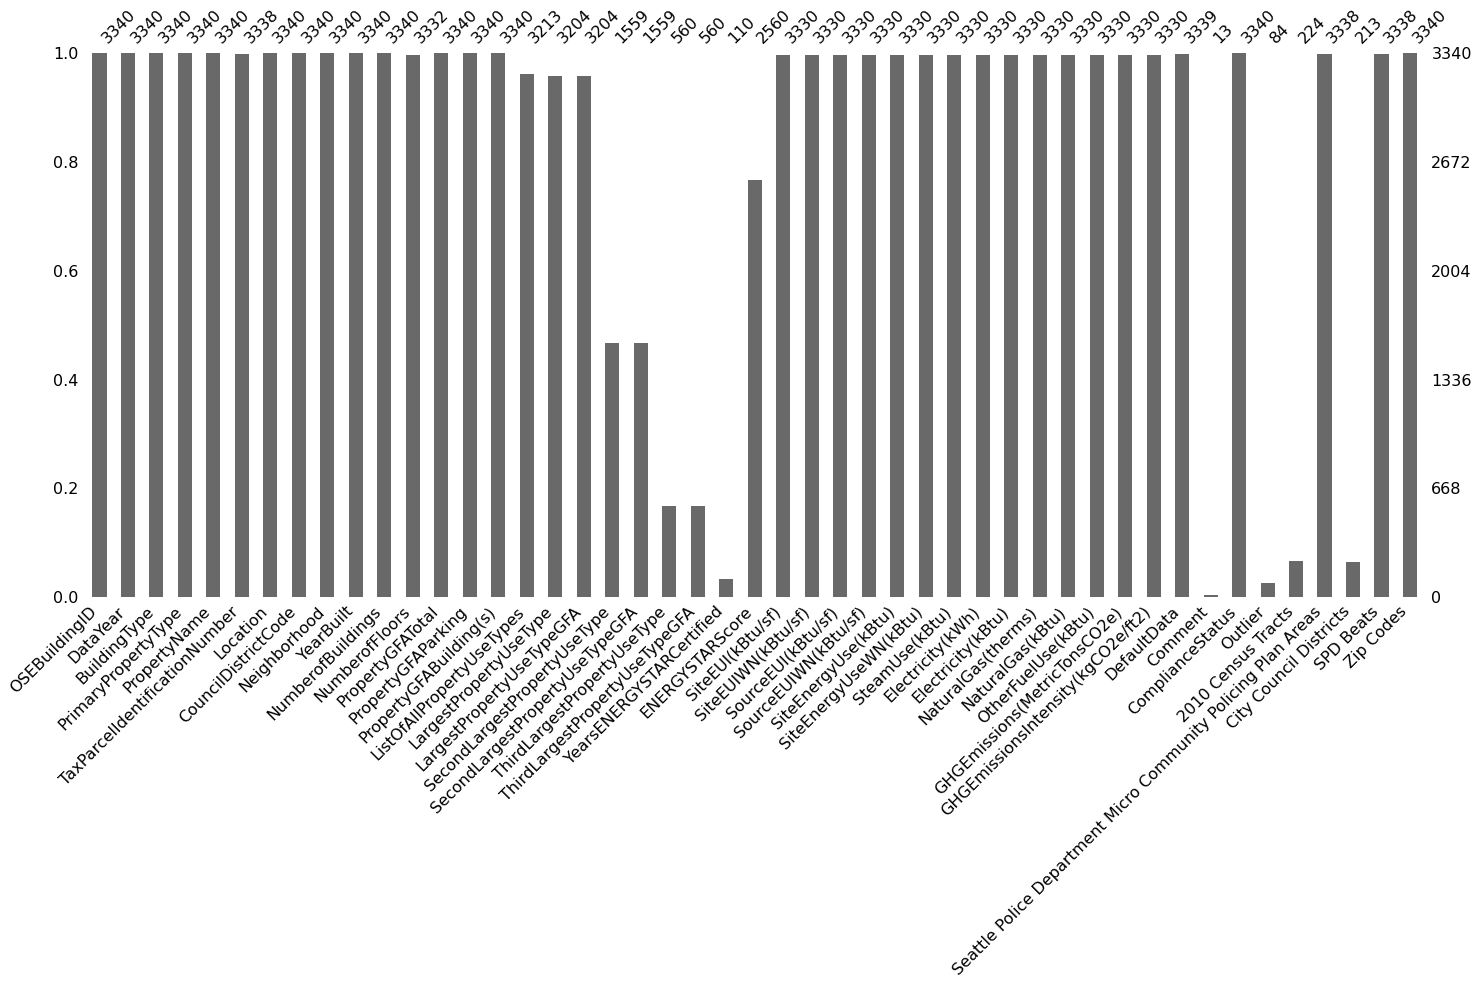

In [110]:
msno.bar(data2015[data2015.columns[:47]])

In [111]:
set(indicators_2016.to_numpy()).difference(indicators.to_numpy())

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [112]:
set(indicators.to_numpy()).difference(set(indicators_2016.to_numpy()))

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

#### Indicateurs 2015-building-energy-benchmarking

name | description 
--- | --- |
OSEBuildingID|A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
"BuildingType"|"City of Seattle building type classification."
PrimaryPropertyType|The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
PropertyName|Official or common property name.
TaxParcelIdentificationNumber|Property King County PIN
CouncilDistrictCode|Property City of Seattle council district.
YearBuilt|Year in which a property was constructed or underwent a complete renovation.
PropertyGFATotal|Total building and parking gross floor area.
PropertyGFAParking|Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).
PropertyGFABuilding(s)|Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.
ENERGYSTARScore|An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
SiteEUI(kBtu/sf)|Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
SiteEUIWN(kBtu/sf)|Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SourceEUI(kBtu/sf)|Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
SourceEUIWN(kBtu/sf)|Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SiteEnergyUse(kBtu)|The annual amount of energy consumed by the property from all sources of energy.
SteamUse(kBtu)|The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
Electricity(kWh)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.
Electricity(kBtu)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
NaturalGas(therms)|The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
GHGEmissions(MetricTonsCO2e)|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity(kgCO2e/ft2)|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources



#### Indicateurs 2016-building-energy-benchmarking

name | description 
--- | --- |
TotalGHGEmissions|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

Indicateur Location dans la table 2015 absent de la table 2016, en revanche les indicateurs Latitude, Longitude, Address, City, State et Zipcode sont absents de la table 2015 et présents dans 2016.

In [113]:
data2015.Location.iloc[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Il semblerait que les colonnes Latitude Longitude Address City State ZipCode soient contenues dans Location

Dans la table 2015, les valeurs de Zip Codes semble être générés automatiquement - on l'écarte du jeu de données

In [114]:
data2015.drop(columns="Zip Codes", inplace=True)

On va donc, dans la table 2015: 
- splitter Location en Latitude, Longitude, Address City State ZipCode
- Retirer Zip Codes

Renommer certaines colonnes pour assurer la correspondance avec 2016, de façon à fusionner les tables
- GHGEmissions(MetricTonsCO2e) (2015) et TotalGHGEmissions (2016) sont en fait les mêmes colonnes
- GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity sont les mêmes colonnes

**1. Split**

In [115]:
from ast import literal_eval # module pour évaluer une expression et renvoyer l'objet correspondant

data2015["Location"] = data2015["Location"].apply(literal_eval) # convertit les str en dict
df = pd.json_normalize(data2015["Location"]) # Normalize semi-structured JSON data into a flat table.
df.human_address = df.human_address.apply(literal_eval)
df2 = pd.json_normalize(df.human_address)
df2.head()

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121


In [116]:
loc = data2015.columns.get_loc("Location")
data2015.drop(columns="Location", inplace=True)
d = pd.concat([df.drop(columns="human_address"), df2], axis=1) # nouveau dataframe à partir des colonnes extraites

for c in d.columns[::-1]: # Insertion des colonnes dans le df original, une par une
    data2015.insert(loc, c, d[c])

data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,latitude,longitude,address,city,...,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.61310583,-122.33335756,724 PINE ST,SEATTLE,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


**2. Renommage**

In [117]:
data2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                         "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity",
                         "Comment":"Comments",
                         "latitude":"Latitude", 
                         "longitude":"Longitude", 
                         "address":"Address", 
                         "city":"City",
                         "state":"State", "zip":"ZipCode"}, inplace=True)

data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Latitude,Longitude,Address,City,...,TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.61310583,-122.33335756,724 PINE ST,SEATTLE,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


Fusion des deux datasets en un dataset global

In [118]:
# création du dataset global
raw_data = pd.concat([data2015, data2016], join="outer")

# Récupération de la liste de colonnes sous forme de Series
raw_data_cols = pd.Series(raw_data.columns, name="data_cols")

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 51 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6714 non-null   object 
 6   Latitude                                                       6716 non-null   object 
 7   Longitude                                                   

## I.2 Sélection des variables

On effectue un premier tri des variables, en écartant d'emblée celles qui semblent le moins pertinentes, et celles qui constituent un risque de fuite de données (SiteEUI, SiteEUIWN, SiteEnergyUseWN, GHGEmissionsIntensity) ou qui ne correspondent pas au cahier des charges (données du permis d'exploitation commercial), comme SourceEUI, SourceEUIWN. On garde en revanche les variables Electricity, NaturalGas, SteamUse comme suggéré.

<AxesSubplot:>

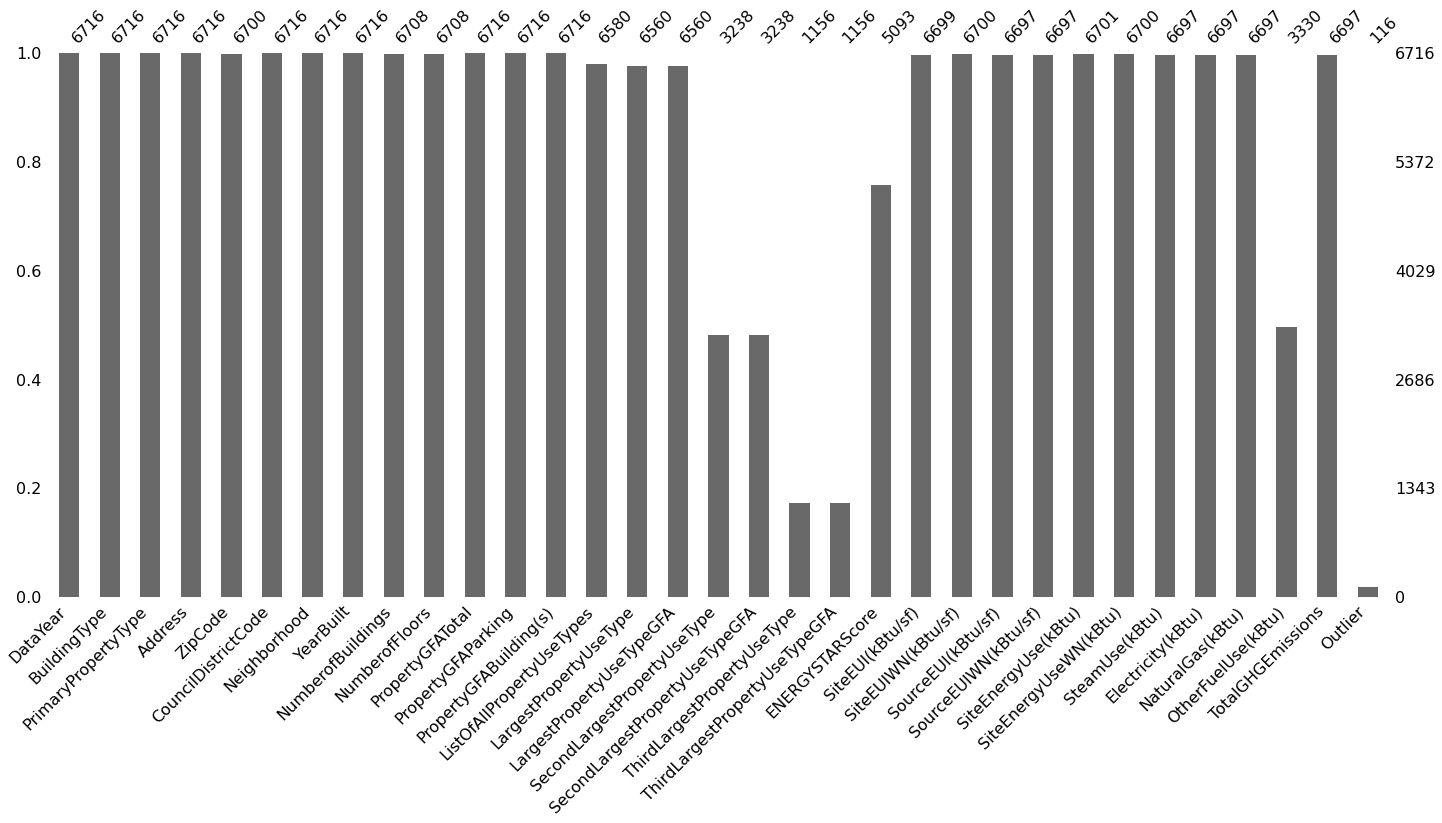

In [119]:
to_drop_index = [0, #OSEBuildingID 
                 *range(4, 8), # PropertyName, TaxParcelIdentificationNumber --> Latitude
                 *range(9, 11), # City, State
                 27, # YearsENERGYSTARCertified
                 #28, # ENERGYSTARScore
                 #30, # SiteEUIWN
                 #32, # SourceEUIWN
                 #34, # SiteEnergyUseWN
                 36, # Electricity (kWh)
                 38, # NaturalGas (therms)
                 *range(42, 46), # GHGEmissionIntensity, DefaultData, Comments, ComplianceStatus
                 *range(47,51)] # 2010 Census Tracts, Seattle Police..., City Council, SPD Beats, ZipCode
to_drop_cols = raw_data_cols.iloc[to_drop_index]
raw_data = raw_data.drop(columns=to_drop_cols)

msno.bar(raw_data)

Toutes les variables sont quasiment ou totalement remplies, à l'exception de SecondLargestPropertyUseType, ThirdLargestPropertyUseType, SecondLargest\[...\]GFA, ThirdLargest\[...\]GFA. On inspecte ces variables, qui semblent appartenir à des couples (catégorielle, quantitative).

**ListofAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType**

In [120]:
raw_data[["ListOfAllPropertyUseTypes",
          "LargestPropertyUseType",
          "SecondLargestPropertyUseType", 
          "ThirdLargestPropertyUseType"]].sample(15)

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
161,K-12 School,K-12 School,NaN,NaN
1721,Multifamily Housing,Multifamily Housing,NaN,NaN
1817,Multifamily Housing,Multifamily Housing,NaN,NaN
1382,"Multifamily Housing, Parking",Multifamily Housing,Parking,NaN
1082,Multifamily Housing,Multifamily Housing,NaN,NaN
571,"Office, Other - Technology/Science, Parking",Office,Parking,Other - Technology/Science
1516,"Financial Office, Multifamily Housing, Parking...",Multifamily Housing,Parking,Financial Office
741,Multifamily Housing,Multifamily Housing,NaN,NaN
1914,Multifamily Housing,Multifamily Housing,NaN,NaN
1538,"Parking, Strip Mall",Strip Mall,Parking,NaN


**Dans les variables catégorielles, on remplace NaN par "None". Sur les variables quantitatives associées, on va remplacer les NaN par 0**

In [121]:
raw_data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
raw_data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
raw_data["SecondLargestPropertyUseType"].fillna("None", inplace=True)
raw_data["ThirdLargestPropertyUseType"].fillna("None", inplace=True)

On n'a plus besoin de la variable ListOfAllPropertyUseTypes

In [122]:
raw_data.drop(columns="ListOfAllPropertyUseTypes", inplace=True)

**OtherFuelUse(kBtu)**

In [123]:
raw_data["OtherFuelUse(kBtu)"].describe()

count    3.330000e+03
mean     7.142301e+03
std      1.962790e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.269669e+06
Name: OtherFuelUse(kBtu), dtype: float64

<AxesSubplot:xlabel='OtherFuelUse(kBtu)', ylabel='Count'>

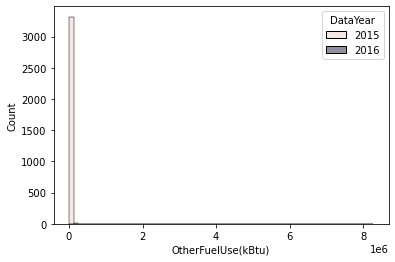

In [124]:
sns.histplot(data=raw_data, x="OtherFuelUse(kBtu)", hue="DataYear", bins=int(1+5*np.log2(raw_data.shape[0])))

In [125]:
print(raw_data["OtherFuelUse(kBtu)"].quantile(0.994))
print(raw_data["OtherFuelUse(kBtu)"].quantile(0.995))

0.0
194.18500000000995


Cette colonne ne contient pratiquement que des valeurs nulles. On la supprime.

<AxesSubplot:>

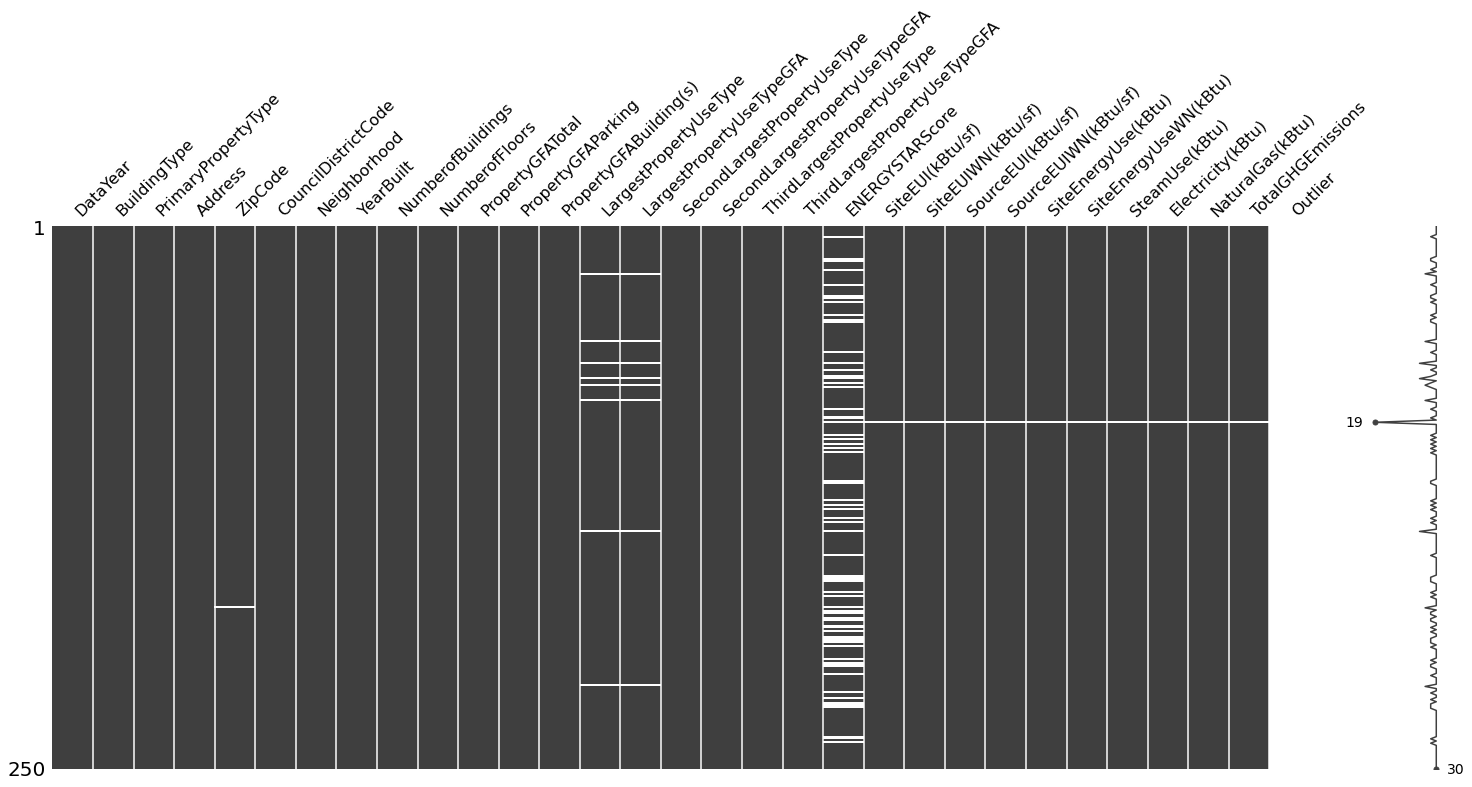

In [126]:
raw_data.drop(columns='OtherFuelUse(kBtu)', inplace=True)
msno.matrix(raw_data.sample(250))

On supprime les lignes contenant des valeurs manquantes.

<AxesSubplot:>

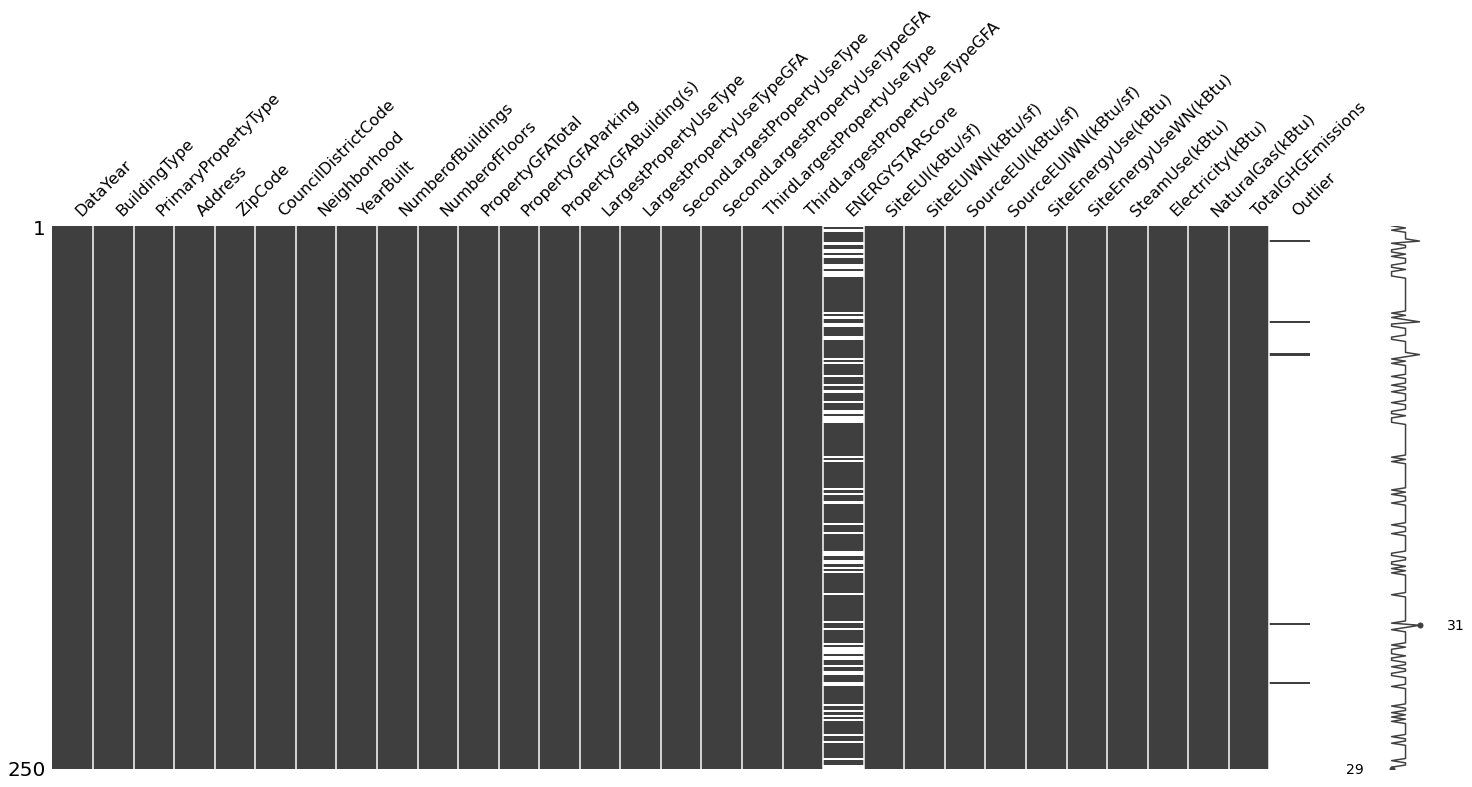

In [127]:
raw_data.dropna(subset=["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], how="any", inplace=True)
raw_data.dropna(subset=["LargestPropertyUseType"],inplace=True)
raw_data.dropna(subset=["NumberofBuildings", "NumberofFloors"], how="any", inplace=True)
msno.matrix(raw_data.sample(250))

**ZipCode**

In [128]:
raw_data[raw_data.ZipCode.isna()]

,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier
3360,2016,Nonresidential COS,Mixed Use Property,10510 5th Ave NE,NaN,5,NORTH,2005,1.0,1.0,...,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.0,6.369655e+05,0.000000e+00,4.44,NaN
3361,2016,Nonresidential COS,Other,405 MLK Jr Way S,NaN,3,CENTRAL,2013,1.0,1.0,...,82.900002,138.600006,149.199997,8.510538e+05,9.691420e+05,0.0,3.472887e+05,5.037650e+05,29.18,NaN
3362,2016,Nonresidential COS,Other,8729 15th Ave NW,NaN,6,BALLARD,2010,1.0,1.0,...,71.800003,139.199997,149.000000,7.834230e+05,8.587730e+05,0.0,4.032431e+05,3.801800e+05,23.00,NaN
3363,2016,Nonresidential COS,Other,2806 NE 127th St,NaN,5,NORTH,1949,1.0,1.0,...,62.599998,140.000000,148.399994,6.456654e+05,7.059837e+05,0.0,4.317954e+05,2.138700e+05,14.37,NaN
3364,2016,Nonresidential COS,Other,6020 28th ave NW,NaN,6,BALLARD,1911,1.0,1.0,...,59.000000,126.000000,129.399994,9.366165e+05,9.905455e+05,0.0,5.421344e+05,3.944820e+05,24.73,NaN
3365,2016,Nonresidential COS,Other,1471 NW 67th St,NaN,6,BALLARD,1972,1.0,1.0,...,420.600006,618.099976,638.900024,5.117308e+06,5.370264e+06,0.0,1.205173e+06,3.912135e+06,216.18,NaN
3366,2016,Nonresidential COS,Office,1403 w howe,NaN,7,MAGNOLIA / QUEEN ANNE,1952,1.0,1.0,...,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,5.026678e+05,0.000000e+00,3.50,NaN
3367,2016,Nonresidential COS,Other,1400 E Galer St,NaN,3,EAST,1912,1.0,1.0,...,286.500000,380.100006,413.200012,5.976246e+06,6.716330e+06,0.0,1.260870e+06,4.715376e+06,259.22,NaN
3368,2016,Nonresidential COS,Mixed Use Property,2323 East Cherry St,NaN,3,CENTRAL,1994,1.0,1.0,...,99.400002,175.199997,184.600006,1.813404e+06,1.993137e+06,0.0,7.694531e+05,1.043951e+06,60.81,NaN
3369,2016,Nonresidential COS,Office,4420 S Genesee,NaN,2,SOUTHEAST,1960,1.0,1.0,...,26.900000,64.099998,66.699997,3.878100e+05,4.141724e+05,0.0,2.775369e+05,1.102730e+05,7.79,NaN


In [129]:
raw_data.dropna(subset=["ZipCode"], inplace=True)
raw_data["ZipCode"] = raw_data["ZipCode"].astype("int64")

**Traitement de la variable Address**

In [130]:
raw_data.Address.sample(10)

467         1000 1st Ave S
369      501 N 34th Street
1532       2233 NW 58th St
1453          1920 4th Ave
2795     400 MAYNARD AVE S
369     13200 AURORA AVE N
859       4907 25th Ave NE
1745          804 9th Ave.
3137         705 5TH AVE S
3294       625 SW 100TH ST
Name: Address, dtype: object

En ne récupérant que le dernier champ, on peut obtenir une information sur le type de voie. Le type de voie peut potentiellement renseigner sur la taille du bâtiment qui s'y trouve (avenue vs. chemin par exemple). On ajoute une condition: si l'élément récupéré se trouve parmi {"N", "S", "E", "W", "NE", "NW", "SE", "SW"}, on récupère l'élément précédent à la place.

In [131]:
raw_data["Address"] = raw_data.Address.apply(lambda x: x.split(' ')[-2].lower()
                      if x.split(' ')[-1].lower() in ["n","s","e","w","ne","nw","se",
                                                      "sw","n.","e.","s.","w.", "north",
                                                      "east", "west", "south", "n.e."]
                      else x.split(' ')[-1].lower())

In [132]:
pd.Series(raw_data.Address.value_counts()).sort_values(ascending=False)[:20]

ave         3233
st          1265
way          618
avenue       378
street       224
ave.         215
st.          143
pl           123
broadway      47
place         30
dr            25
blvd          14
s.w.          10
drive          8
madison        6
so.            5
n.w.           5
               4
pike           4
jackson        4
Name: Address, dtype: int64

In [133]:
raw_data["Address"] = raw_data.Address.apply(lambda x: "avenue" if "ave" in x else x)
raw_data["Address"] = raw_data.Address.apply(lambda x: "street" if "st" in x else x)
raw_data["Address"] = raw_data.Address.apply(lambda x: "place" if "pl" in x else x)

pd.Series(raw_data.Address.value_counts()).sort_values(ascending=False)[:20]

avenue        3828
street        1639
way            618
place          157
broadway        47
dr              25
blvd            14
s.w.            10
drive            8
madison          6
so.              5
n.w.             5
                 4
jackson          4
pike             4
so               4
harrison         4
republican       3
ct               3
pkwy             3
Name: Address, dtype: int64

<AxesSubplot:>

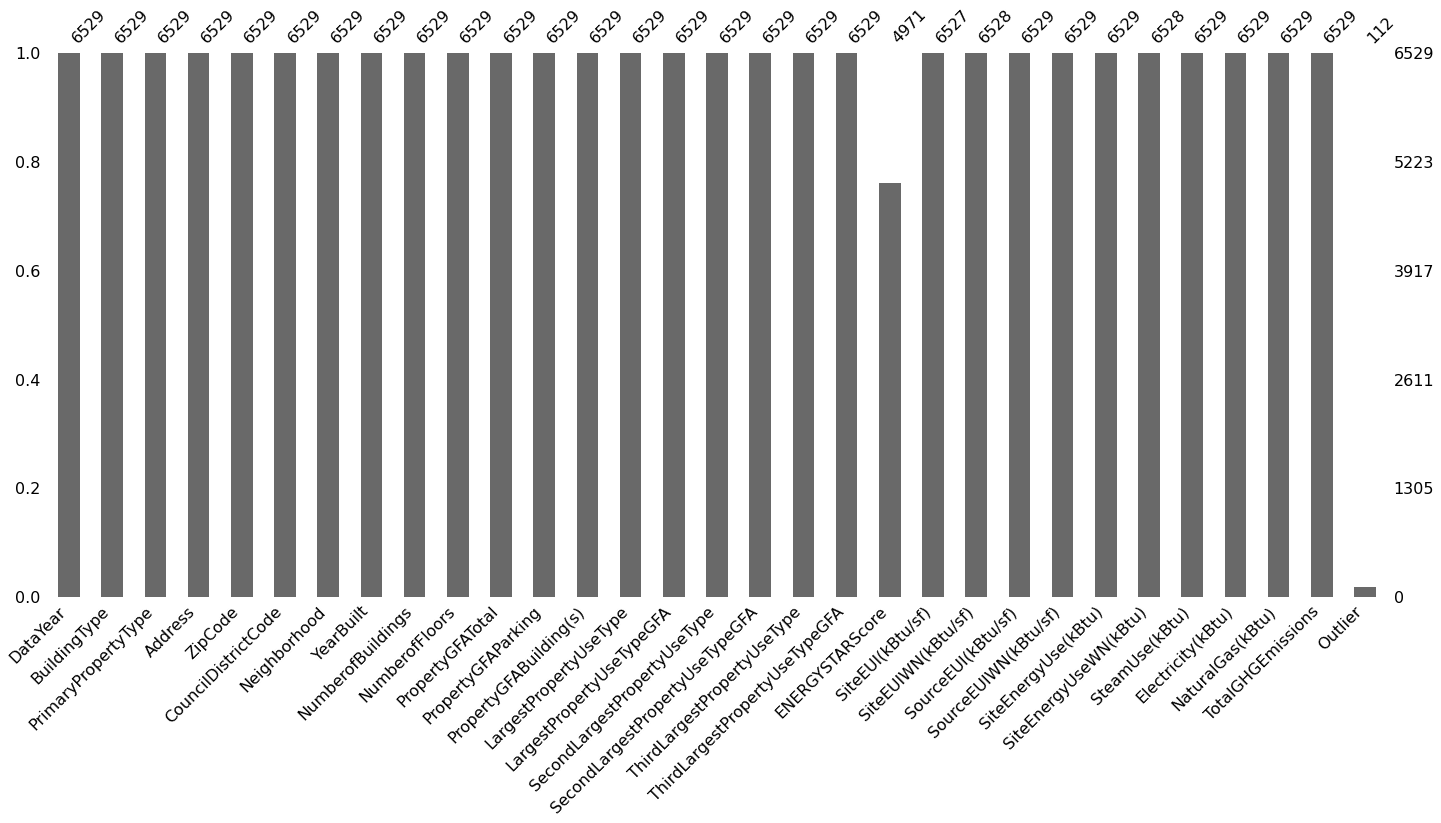

In [134]:
raw_data.to_csv("./raw_data.csv", index_label=False)
msno.bar(raw_data)

# II. Analyse exploratoire

In [135]:
raw_data = pd.read_csv("./raw_data.csv")

## II.1 Variables qualitatives et variables quantitatives

In [136]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6529 entries, 0 to 3359
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6529 non-null   int64  
 1   BuildingType                     6529 non-null   object 
 2   PrimaryPropertyType              6529 non-null   object 
 3   Address                          6525 non-null   object 
 4   ZipCode                          6529 non-null   int64  
 5   CouncilDistrictCode              6529 non-null   int64  
 6   Neighborhood                     6529 non-null   object 
 7   YearBuilt                        6529 non-null   int64  
 8   NumberofBuildings                6529 non-null   float64
 9   NumberofFloors                   6529 non-null   float64
 10  PropertyGFATotal                 6529 non-null   int64  
 11  PropertyGFAParking               6529 non-null   int64  
 12  PropertyGFABuilding(

Quatre valeurs manquantes pour Address. On supprime les lignes associées.

In [137]:
raw_data.dropna(subset=["Address"], inplace=True)

**On sépare le dataframe en deux: les colonnes numériques et les colonnes "object"**

In [138]:
mask = raw_data.dtypes!="object"
numerical_features = mask[mask].index
numerical_features

Index(['DataYear', 'ZipCode', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [139]:
mask = raw_data.dtypes=="object"
object_features = mask[mask].index
object_features

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier'],
      dtype='object')

**Les colonnes DataYear, YearBuilt, NumberofBuildings, NumberofFloors, ENERGYSTARScore, ZipCode sont des variables catégorielles en réalité**

In [140]:
num_categorical = pd.Index(["DataYear",
                            "YearBuilt", 
                            "CouncilDistrictCode",
                            "NumberofBuildings",
                            "NumberofFloors",
                            "ENERGYSTARScore",
                            "ZipCode"
                           ])

In [141]:
# On récupère ces colonnes dans la liste des indicateurs catégoriels
categorical_features = object_features.append(num_categorical)
categorical_features

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier', 'DataYear', 'YearBuilt',
       'CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors',
       'ENERGYSTARScore', 'ZipCode'],
      dtype='object')

In [142]:
# On crée l'index quantitative_features qui ne contient que les variables quantitatives
quantitative_features = pd.Index([c for c in numerical_features if c not in categorical_features])
quantitative_features

Index(['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

## II.2 Variables quantitatives

### II.2.1 Distribution des variables quantitatives

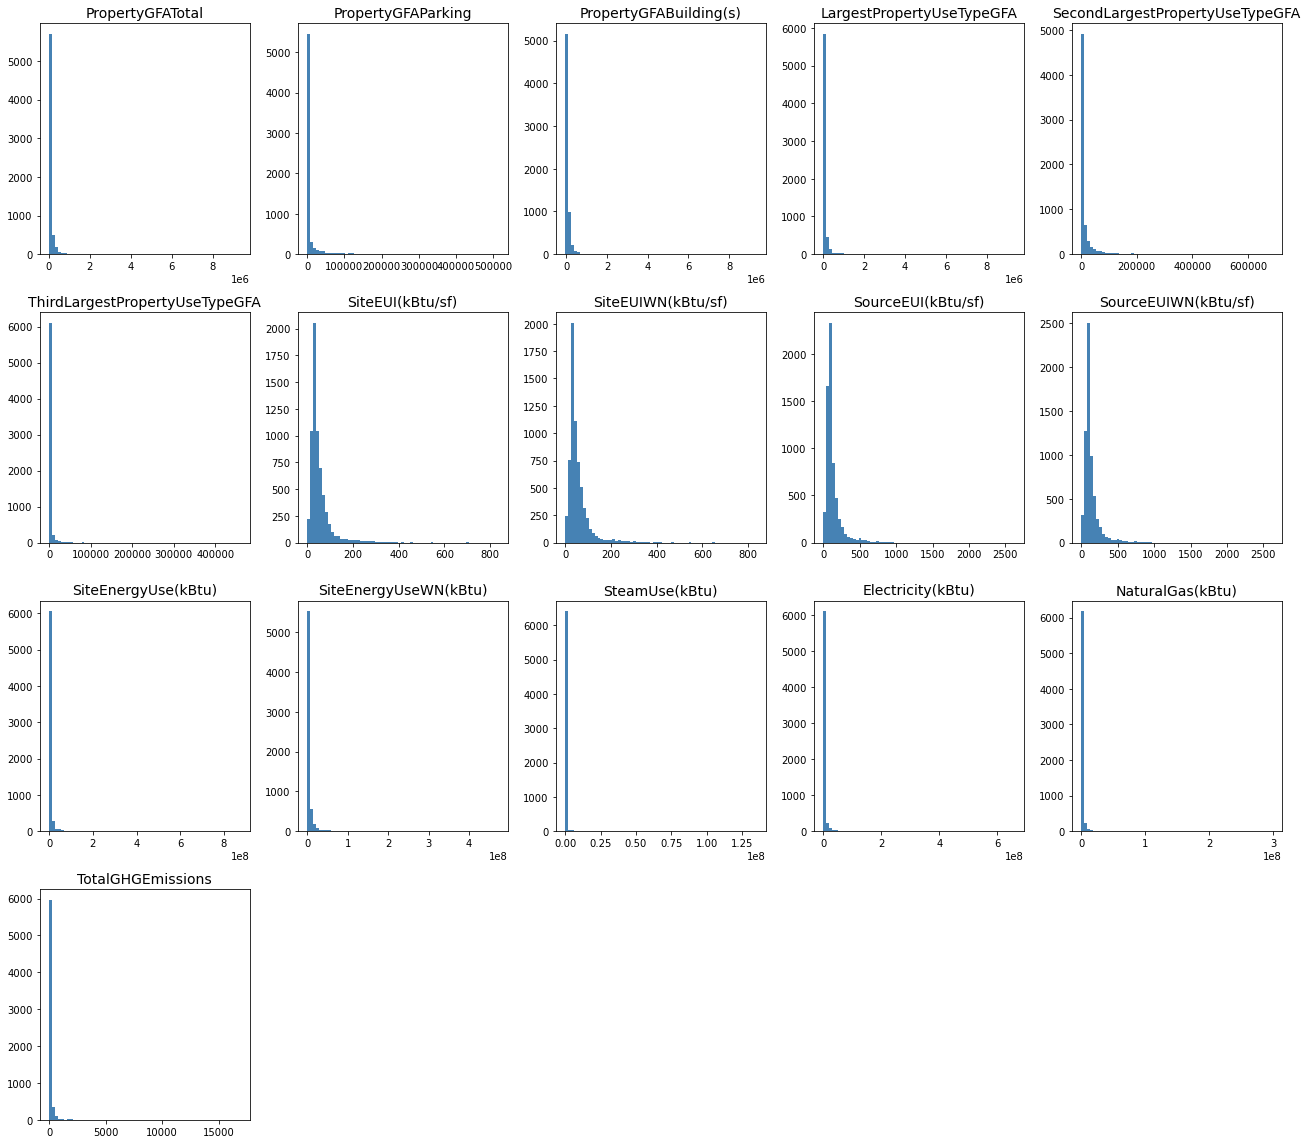

In [143]:
fig = plt.figure(figsize=(18, 16))
for feat_idx, feat in enumerate(quantitative_features):
    ax = fig.add_subplot(4,5, (feat_idx+1))
    h = ax.hist(raw_data[feat], bins=5*int(1+np.log2(raw_data.shape[0])), color = 'steelblue', density=False, edgecolor='none')
    ax.set_title(feat, fontsize=14)
    plt.tight_layout()

Données très dispersées. Echelles très différentes d'une variable à l'autre. On a des outliers. On a également des valeurs à 0 (NumberofBuildings, TotalGHGEmission, LargestPropertyUseTypeGFA etc.) Surement des valeurs aberrantes.  On vérifie.

In [144]:
for feat in quantitative_features:
    print(raw_data[feat].describe(percentiles=[0.5, 0.95]))
    print("-"*40)

count    6.525000e+03
mean     9.298634e+04
std      1.891665e+05
min      1.630000e+04
50%      4.409800e+04
95%      3.133784e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64
----------------------------------------
count      6525.000000
mean       9527.811341
std       34001.888744
min          -3.000000
50%           0.000000
95%       56639.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64
----------------------------------------
count    6.525000e+03
mean     8.345853e+04
std      1.750061e+05
min     -5.055000e+04
50%      4.223900e+04
95%      2.724100e+05
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64
----------------------------------------
count    6.525000e+03
mean     7.715213e+04
std      1.684112e+05
min      5.656000e+03
50%      3.960000e+04
95%      2.414536e+05
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64
----------------------------------------
count      6525.000000
mean      13904.1

Confirmation de l'observation précédente: valeurs aberrantes (surfaces négatives), très dispersées (std >= moyenne), présence probable d'outliers (max >> {moyenne, mediane}). Distribution non-normales.

### II.2.2 outliers

On utilise la colonne "Outlier"

In [145]:
raw_data["Outlier"].head()

0             NaN
1             NaN
2             NaN
3    High Outlier
4             NaN
Name: Outlier, dtype: object

In [146]:
raw_data["Outlier"].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [147]:
# On regroupe les outliers dans la catégorie "Yes", et les valeurs NaN dans "No"
outlier_yn = raw_data["Outlier"].where(raw_data["Outlier"].notna(), "No")
raw_data["Outlier_yn"] = outlier_yn
raw_data["Outlier_yn"] = raw_data["Outlier_yn"].apply(lambda x: "Yes" if x!="No" else x)

# On exclut les outliers
raw_data = raw_data.loc[raw_data.Outlier_yn=="No"]

# On supprime les colonnes "Outlier" et "Outlier_yn"
raw_data.drop(columns=["Outlier", "Outlier_yn"], inplace=True)

# On supprime également cette variables de la liste categorical
categorical_features = categorical_features.drop(["Outlier"])

In [148]:
# On corrige les valeurs négatives de PropertyGFABuilding(s)
m = raw_data["PropertyGFABuilding(s)"] <= 0
raw_data["PropertyGFABuilding(s)"].mask(m, -raw_data["PropertyGFABuilding(s)"], inplace=True)

# On retire les valeurs de TotalGHGEmissions, NumberofBuildings qui sont négatives ou nulles, et
# les valeurs de SiteEnergyUse(kBtu) qui sont nulles (nécessaire pour prendre le logarithme des variables
# cibles en vue des prédictions)
d = raw_data.query("TotalGHGEmissions<=0 or NumberofBuildings<=0 or `SiteEnergyUse(kBtu)`==0").index
raw_data.drop(index=d, inplace=True)

# Il y a un bâtiment de 99 étages dont les émissions sont quasi-nulles: on l'écarte, il s'agit certainement
# d'un outlier.
raw_data = raw_data[raw_data.NumberofFloors<80] 

In [149]:
# Reindexation du dataframe
raw_data.index = pd.Index(range(0, raw_data.shape[0]))

raw_data.to_csv("./data.csv", index_label=False)
data = raw_data

## II.2.3 Transformation des variables cibles

On remplace les variables targets par leur log.

In [150]:
data = pd.read_csv("./data.csv")

In [151]:
data["SiteEnergyUse_log"] = data["SiteEnergyUse(kBtu)"].apply(np.log10)
data["TotalGHGEmissions_log"] = data["TotalGHGEmissions"].apply(np.log10)
targets = pd.Index(["SiteEnergyUse_log", "TotalGHGEmissions_log"])
quantitative_features = quantitative_features.append(pd.Index(["SiteEnergyUse_log", "TotalGHGEmissions_log"]))

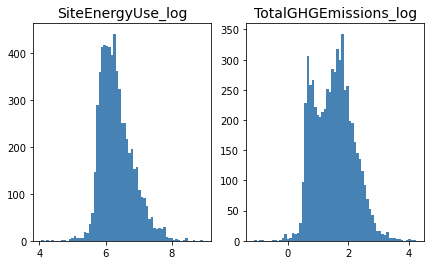

In [152]:
fig = plt.figure(figsize=(7, 4))
for feat_idx, feat in enumerate(targets):
    ax = fig.add_subplot(1,2, (feat_idx+1))
    h = ax.hist(data[feat], bins=5*int(1+np.log2(data.shape[0])), color = 'steelblue', density=False, edgecolor='none')
    ax.set_title(feat, fontsize=14)

Distribution clairement bi-modale pour TotalGHGEmissions_log

**SourceEUI, SourceEUIWN**

On commence par tester l'hypothèse selon laquelle le coefficient de proportionnalité entre les variables SiteEUI, SourceEUI (et leurs variantes WN) est égal à LargestPropertyUseTypeGFA.

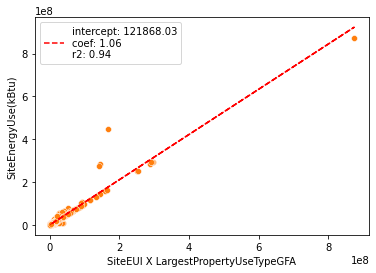

In [153]:
SiteEnergyUse = data["SiteEUI(kBtu/sf)"]*data["LargestPropertyUseTypeGFA"]

sns.scatterplot(data = SiteEnergyUse, y=data["SiteEnergyUse(kBtu)"])

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = SiteEnergyUse.to_numpy().reshape(-1, 1)
y = data["SiteEnergyUse(kBtu)"].to_numpy()

lr.fit(X, y)
r2 = lr.score(X, y)
sns.scatterplot(x=SiteEnergyUse, y=data["SiteEnergyUse(kBtu)"])
plt.plot(X, lr.intercept_ + X*lr.coef_, linestyle="--", color="r", label="intercept: {:.2f}\ncoef: {:.2f}\nr2: {:.2f}".format(lr.intercept_, lr.coef_[0], r2))
plt.legend()
plt.xlabel("SiteEUI X LargestPropertyUseTypeGFA")
plt.show()

In [154]:
data["SourceEnergyUseWN(kBtu)"] = data["SourceEUIWN(kBtu/sf)"]*data["LargestPropertyUseTypeGFA"]
data["SourceEnergyUse(kBtu)"] = data["SourceEUI(kBtu/sf)"]*data["LargestPropertyUseTypeGFA"]
quantitative_features = quantitative_features.append(pd.Index(["SourceEnergyUse(kBtu)", "SourceEnergyUseWN(kBtu)"]))

## II.2.4 Etude des corrélations

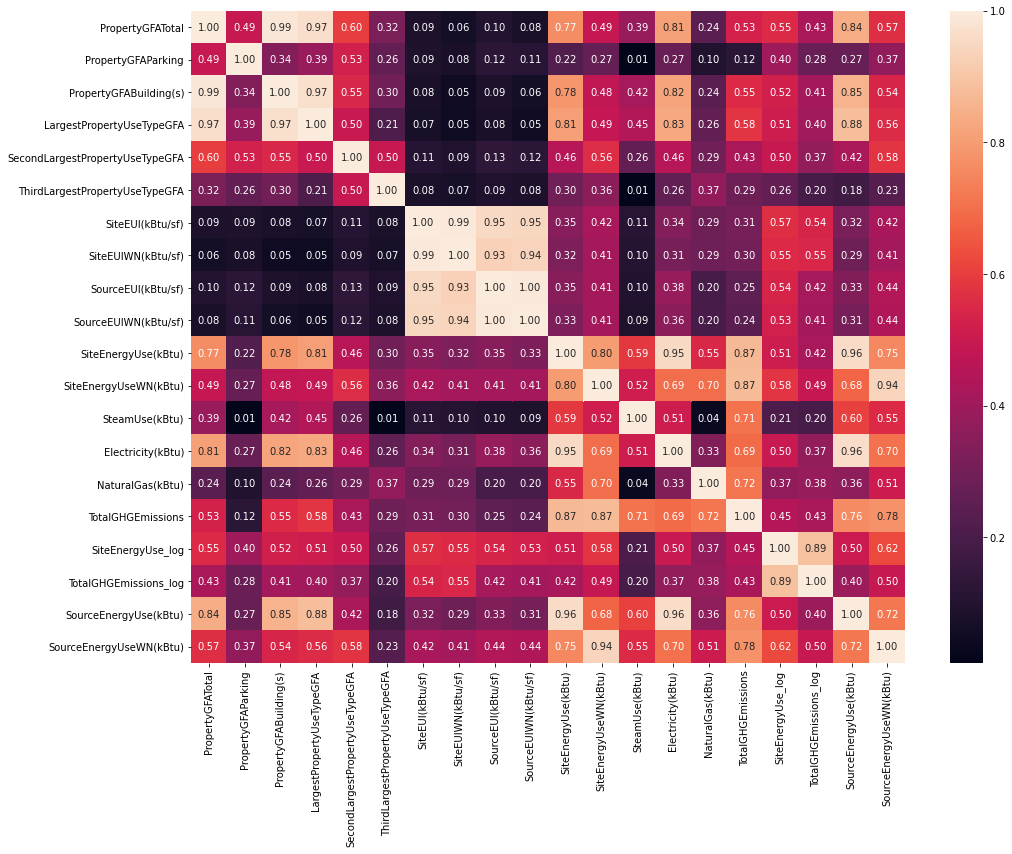

In [155]:
corr = data[quantitative_features].corr() # pearson
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Globalement, corrélations plus fortes avec les cibles  qu'avec les log des cibles. Les log des cibles sont plus fortement corrélées (linéairement) entre eux que les cibles elles-mêmes.
Enfin, SiteEnergyUse plus fortement corrélée avec les autres variables que TotalGHGEmissions: on va d'abord chercher à prédire SiteEnergyUse, puis on va chercher à prédire TotalGHGEmissions à partir de cette prédiction.

#### II.2.4.i Variables cibles

In [156]:
feats = ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]
feats_log = ["TotalGHGEmissions_log", "SiteEnergyUse_log"]

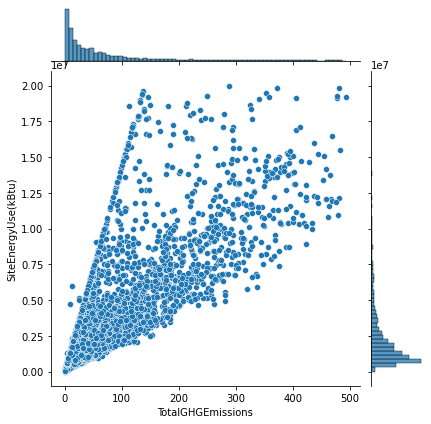

In [157]:
# jointplot sans les outliers pour une meilleure visualisation
sns.jointplot(data=data.query("TotalGHGEmissions<500 and `SiteEnergyUse(kBtu)`<2e7"), x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)")
plt.show()

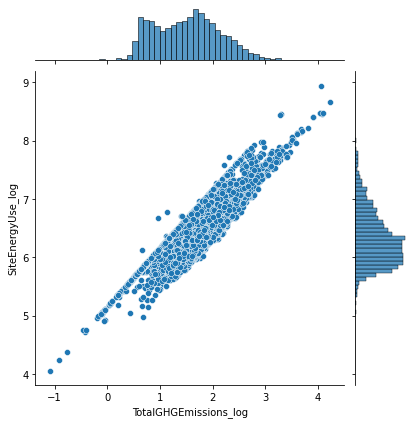

In [158]:
sns.jointplot(data=data, x="TotalGHGEmissions_log", y="SiteEnergyUse_log")
plt.show()

#### II.2.4.ii Prédicteurs

* On a de fortes corrélations entre les variables "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
* Ces variables sont elles-mêmes fortement corrélées à Electricity(kBtu)
* Electricity(kBtu) très fortement corrélée à SiteEnergyUSe
* Electricity, Steam, NaturalGas fortement corrélées à TotalGHGEmissions
* "L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées)."

### II.2.5 Transformation des variables "d'énergie"

SiteEnergyUse somme des énergies?

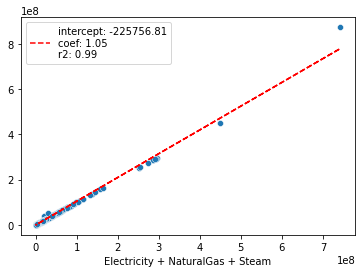

In [159]:
sum_energy = data["Electricity(kBtu)"] + data["NaturalGas(kBtu)"] + data["SteamUse(kBtu)"]

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = sum_energy.to_numpy().reshape(-1, 1)
y = data["SiteEnergyUse(kBtu)"].to_numpy()

lr.fit(X, y)
r2 = lr.score(X, y)
sns.scatterplot(x=sum_energy, y=y)
plt.plot(sum_energy, lr.intercept_ + sum_energy*lr.coef_, linestyle="--", color="r", label="intercept: {:.2f}\ncoef: {:.2f}\nr2: {:.2f}".format(lr.intercept_, lr.coef_[0], r2))
plt.legend()
plt.xlabel("Electricity + NaturalGas + Steam")
plt.show()

On est autorisé à utiliser des variables reflétant la _proportion_ et la _nature_ des énergies utilisées.

In [160]:
data["Electricity_ratio"] = data[["Electricity(kBtu)", "SiteEnergyUse(kBtu)"]].apply(lambda x: x[0]/x[1], axis=1)
data["NaturalGas_ratio"] = data[["NaturalGas(kBtu)", "SiteEnergyUse(kBtu)"]].apply(lambda x: x[0]/x[1], axis=1)
data["Steam_ratio"] = data[["SteamUse(kBtu)", "SiteEnergyUse(kBtu)"]].apply(lambda x: x[0]/x[1], axis=1)

quantitative_features = quantitative_features.append(pd.Index(["Electricity_ratio", "NaturalGas_ratio", "Steam_ratio"]))

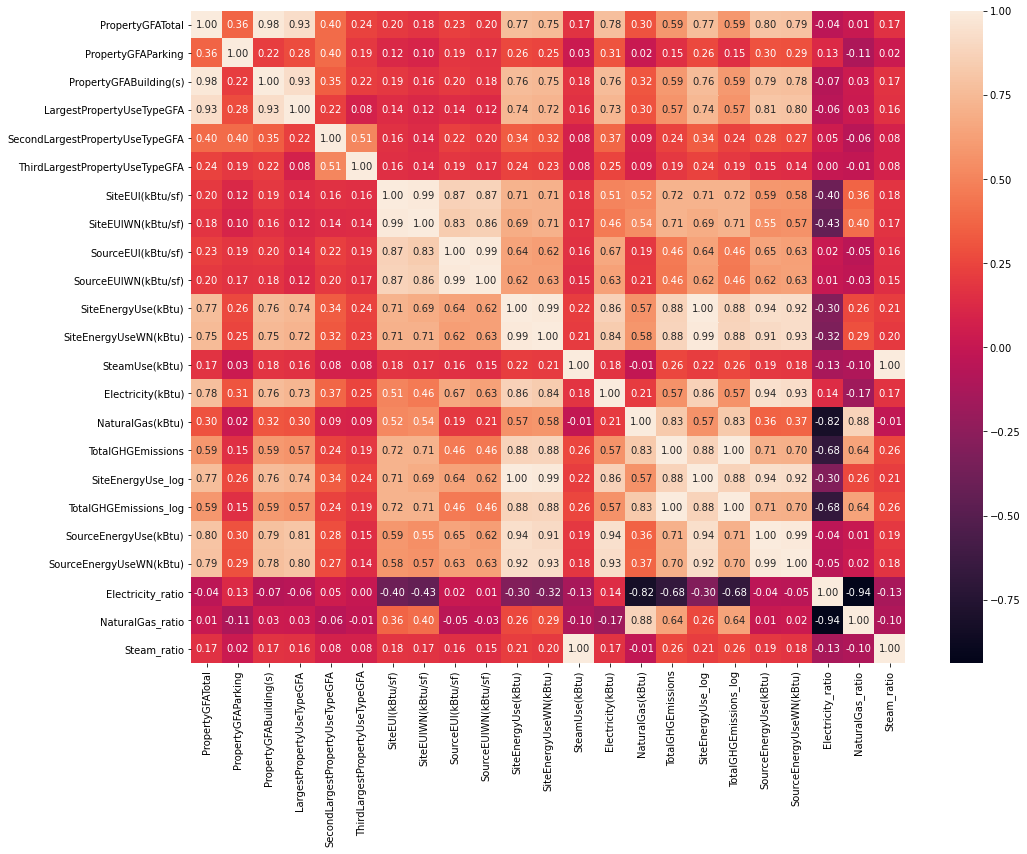

In [161]:
corr = data[quantitative_features].corr(method="spearman")
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [162]:
data.drop(columns=["Electricity(kBtu)", "NaturalGas(kBtu)", "SteamUse(kBtu)"], inplace=True)

### II.2.6 ACP sur les variables quantitatives

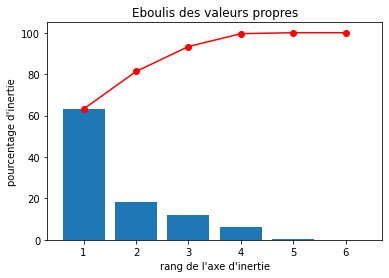

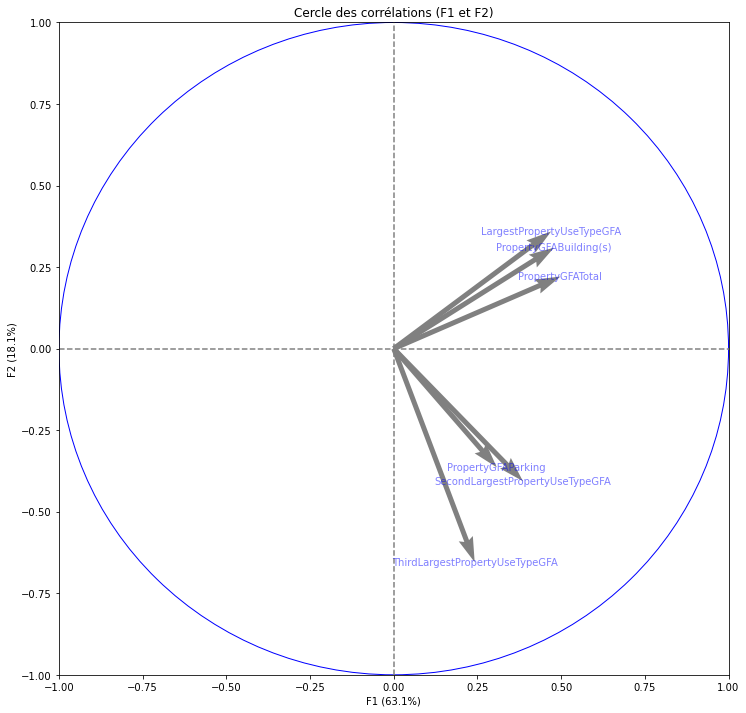

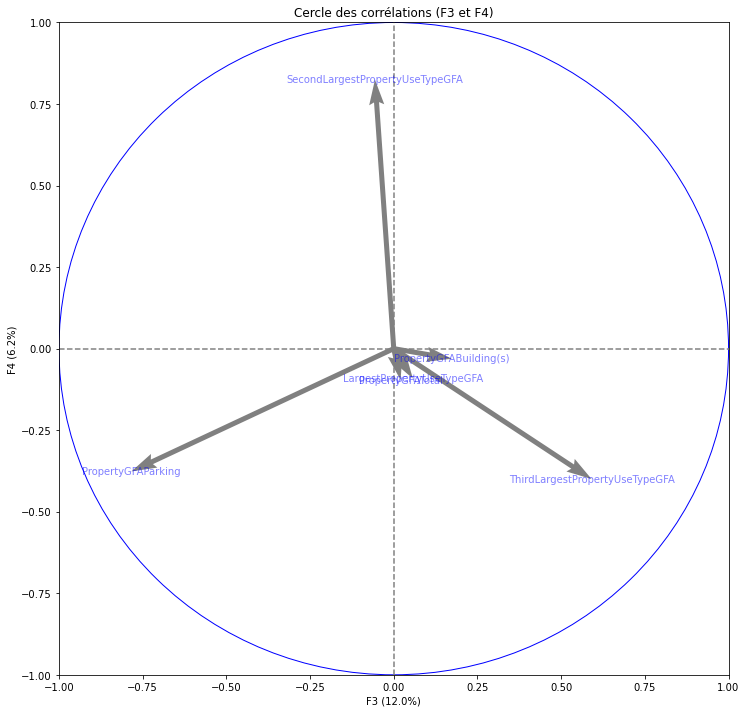

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from functions import *

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)",
                 "LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
                 "ThirdLargestPropertyUseTypeGFA"
                ]]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index 
features = data_pca.columns

# Centrage et Réduction
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = PCA()
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels = np.array(names))

#plt.show()

In [164]:
data["F1"] = X_projected[:, 0]
data["F2"] = X_projected[:, 1]
data["F3"] = X_projected[:, 2]
data["F4"] = X_projected[:, 3]
data.drop(columns=data_pca.columns, inplace=True)
quantitative_features_pca = pd.Index([c for c in data.columns
                                      if c not in categorical_features])

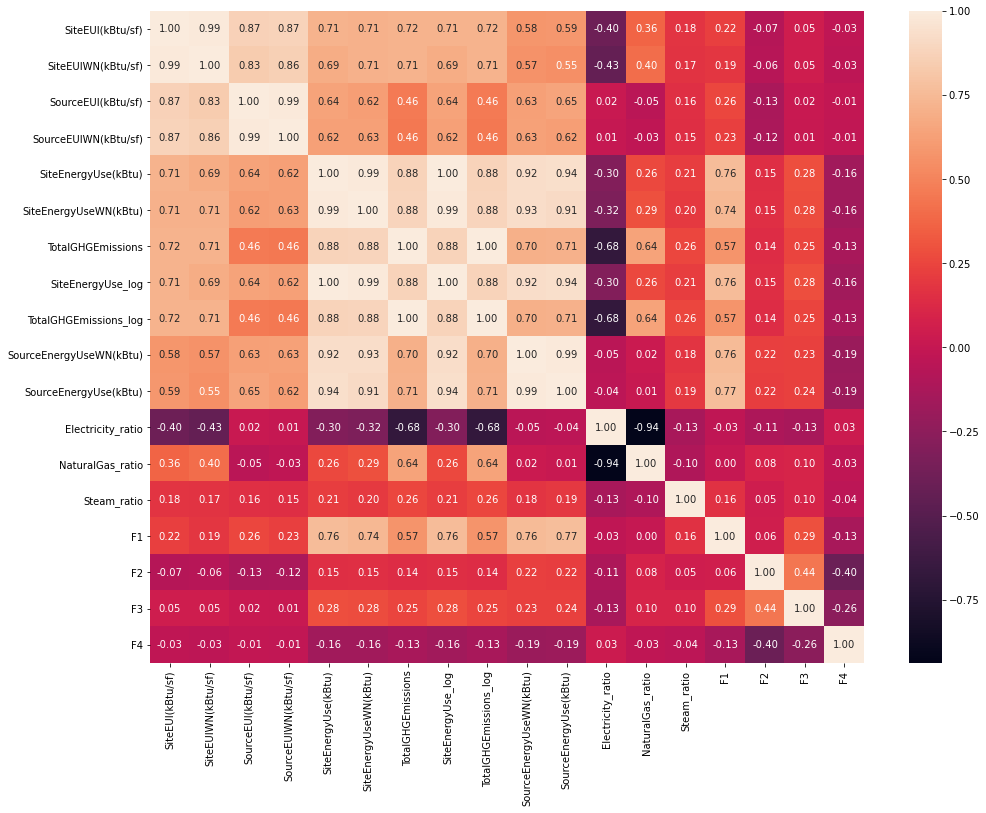

In [165]:
corr = data[quantitative_features_pca].corr(method="spearman")
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

## II.3 Variables catégorielles

### II.3.1 Nettoyage des variables catégorielles

On commence par afficher les variables catégorielles ainsi que le nombre de modalités pour chacune d'entre elles.

In [166]:
#categorical_features = categorical_features.drop(["ZipCode"])
pd.DataFrame(data={"nombre de modalités":data[categorical_features].nunique()})

,nombre de modalités
BuildingType,8
PrimaryPropertyType,30
Address,128
Neighborhood,18
LargestPropertyUseType,56
SecondLargestPropertyUseType,51
ThirdLargestPropertyUseType,44
DataYear,2
YearBuilt,113
CouncilDistrictCode,7


Création d'une fonction permettant l'affichage pour une variable catégorielle donnée des différentes modalités et du nombre de représentants pour chacune d'entre elles.

In [167]:
def valuecount_df(var):
    counts = data[var].value_counts()
    return pd.DataFrame({"nb_items": counts})

In [168]:
#categorical_features = ["BuildingType", "PrimaryPropertyType", "Neighborhood", "LargestPropertyUseType",
#                        "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "Address", "YearBuilt",
#                        "NumberofBuildings", "NumberofFloors"]

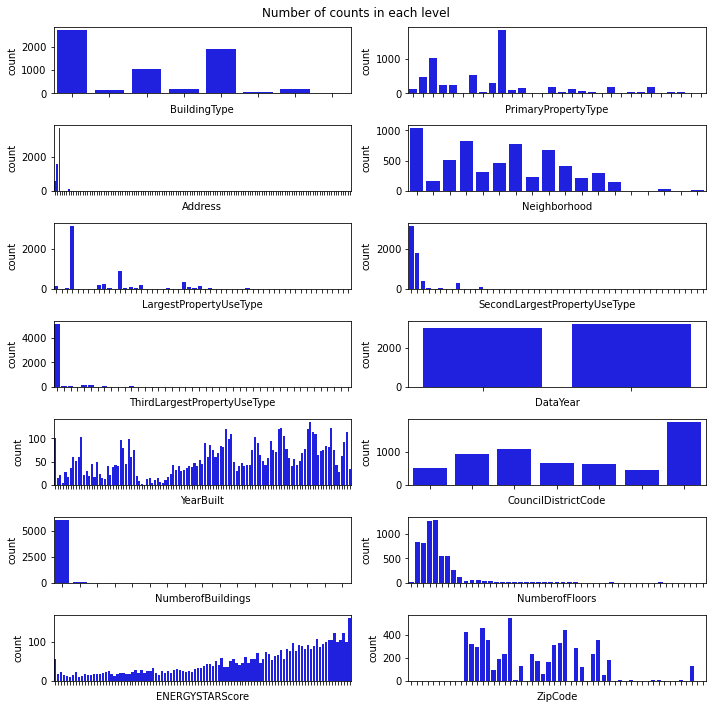

In [169]:
plt.figure(figsize=(10, 10))
plt.suptitle("Number of counts in each level")
for i, c in enumerate(categorical_features):
    ax = plt.subplot(7, 2, i+1)
    sns.countplot(data=data,
                  x=c,
                  color="b"
                  #orient="h",
                  #ax=axs[i]
                 )
    
    ax.set_xticklabels("")
    plt.tight_layout()
plt.show()    

On a $\approx$ 6200 éléments au total. Comme il y a pour chaque variable beaucoup de modalités ne comportant qu'un très faible nombre d'éléments, on va chercher à fusionner certaines modalités:
* Pour la variables YearBuilt, on va commencer par regrouper les années en décénnies.
* Pour les autres variables, on va fusionner toutes les catégories ayant moins de l'équivalent de 1% du jeu de données total. On considère que les modalités ayant trop peu d'éléments "bruitent" le modèle, plutôt que d'y apporter de l'information. On regroupera ces catégories dans la catégorie "Other".

Pour YearBuilt on commence par regrouper les années en décennies.

In [170]:
nb_decennies = 1+(data.YearBuilt.max()-data.YearBuilt.min())//10
bins = [1900+i*10 for i in range(nb_decennies)]
yb_grouped = np.digitize(data.YearBuilt, bins)
yb_grouped = pd.Series(data=yb_grouped, name="yb_grouped", dtype="int64")

data.YearBuilt = yb_grouped

**Etude de ENERGYSTARScore**

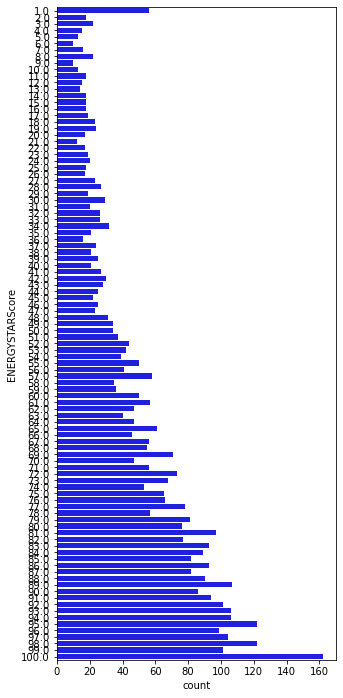

In [171]:
plt.figure(figsize=(5, 12)) 
sns.countplot(data=data,
                  y="ENERGYSTARScore", 
                  orient="h",
                  color="b"
                 )
plt.show()

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='SourceEnergyUseWN(kBtu)'>

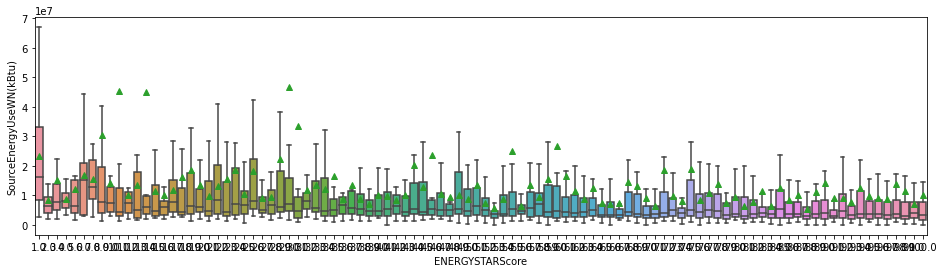

In [172]:
plt.figure(figsize=(16, 4))
sns.boxplot(x="ENERGYSTARScore", y="SourceEnergyUseWN(kBtu)", data=data, showfliers=False, showmeans=True, color=None)

Regroupement de ENERGYSTARScore en déciles?

In [173]:
nb_deciles = 1+(data.ENERGYSTARScore.max()-data.ENERGYSTARScore.min())//10
bins = [1+i*10 for i in range(int(nb_deciles))]
esc = np.digitize(data.ENERGYSTARScore, bins)
esc = pd.Series(data=esc, name="esc", dtype="int64")

data.ENERGYSTARScore = esc

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='SourceEnergyUseWN(kBtu)'>

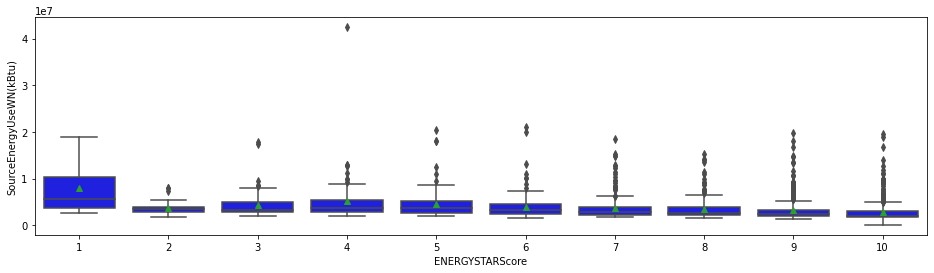

In [174]:
plt.figure(figsize=(16, 4))
sns.boxplot(x="ENERGYSTARScore", 
            y="SourceEnergyUseWN(kBtu)",
            data=data[data
                      .PrimaryPropertyType=="Low-Rise Multifamily"],
            showfliers=True,
            showmeans=True,
            color="b"
           )

In [177]:
def drop_class(features, prop_tokeep):
    d = data.copy()
    for f in features:
        vcounts = d[f].value_counts()
        nkeep = prop_tokeep*data.shape[0]
        d[f] = d[f].apply(lambda x: "Other" 
                                if vcounts[x] <= nkeep
                                else x)
    return d

# en fonction des résultats de prédiction des différents modèles on pourra modifier ce coefficient 
# pour écarter plus ou moins de modalités
prop_tokeep = [0.01, 0.02, 0.05, 0.1]

In [178]:
models = []
for p in prop_tokeep:
        models.append(drop_class(categorical_features, p))
        

Réaffichons les countplots de chaque variables catégorielle pour visualiser le résultat des fusions.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all 

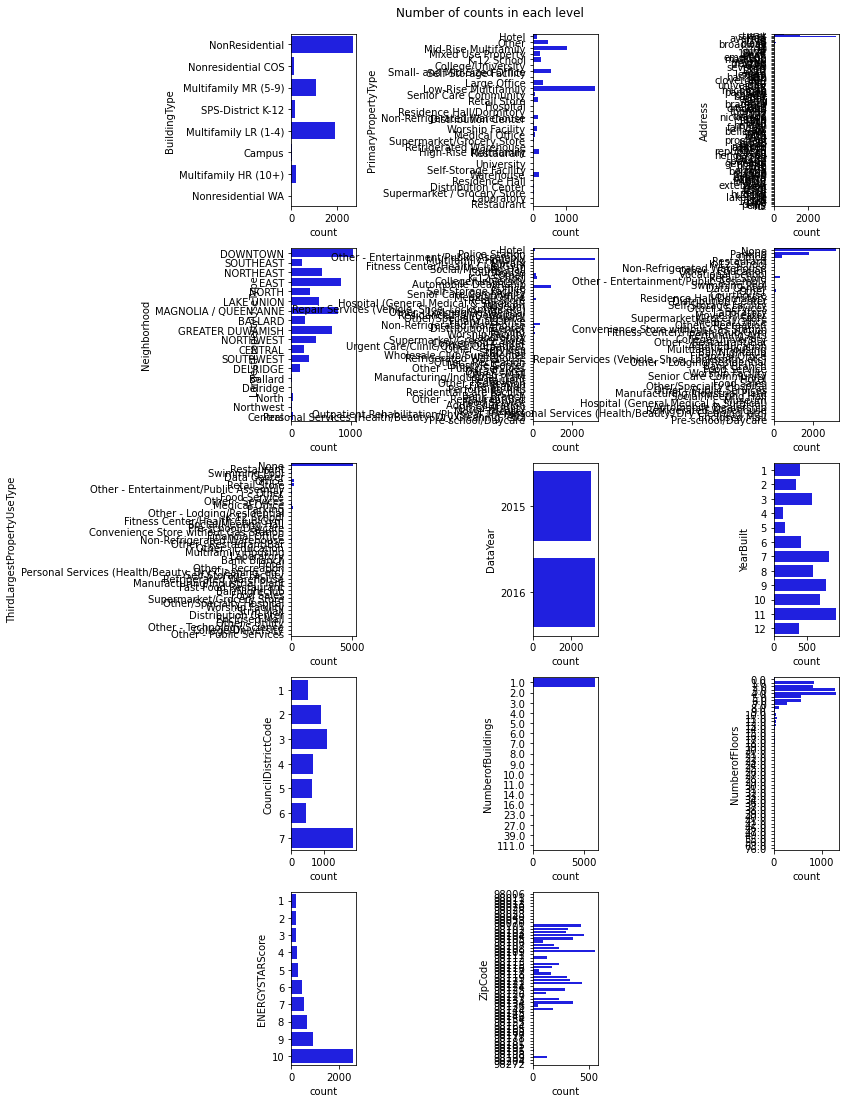

In [179]:
plt.figure(figsize=(10, 15))
plt.suptitle("Number of counts in each level", y=0.99)
for i, c in enumerate(categorical_features):
    ax = plt.subplot(5, 3, i+1)
    sns.countplot(data=models[1],
                  y=c, 
                  orient="h",
                  color="b"
                  #ax=axs[i]
                 )
    
    #ax.set_xticklabels("")
    plt.tight_layout()
plt.show()

In [180]:
models[0].to_csv("./modele1_1p.csv", index_label=False)
models[1].to_csv("./modele1_2p.csv", index_label=False)
models[2].to_csv("./modele1_5p.csv", index_label=False)
models[3].to_csv("./modele1_10p.csv", index_label=False)

# mise à jour du jeu de données
data = models[0] 

### II.3.2 Etude des corrélations

On inspecte les associations existantes entre les variables quantitatives, d'abord entre chacune d'elles et les variables cibles, puis entre elles.

Ecriture d'une fonction qui affiche les diagrammes en boîte de chaque modalité versus la variable cible (SiteEnergyUse ou TotalGHGEmissions). On utilise les variables "originales" et non leur log, car pour l'analyse des corrélations il est nécessaire que l'échelle de la variables cible soit linéaire, et non logarithmique [1](#http://vassarstats.net/textbook/)

In [181]:
def make_plot(var, target, xmin=None, xmax=None, ax=None):
    means = data.groupby(var)[target].mean().sort_values().index
    
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 6), sharey=True)
    sns.boxplot(y=var, x=target, data=data, ax=ax, orient="h", showfliers=False, showmeans=True, order=means)
    #sns.countplot(data=data, y=var, orient="h", ax=ax2, order=means)
    try:
        ax1.set_xlim(xmin, xmax)
    except:
        pass
    #plt.show()

On écrit également une fonction permettant de réaliser une ANOVA. Cela permettra de déterminer les modalités qui peuvent être regroupées car statistiquement indiscernables. 

In [182]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def make_anova(data, quant_var, cat_var, subcat=None):
    model = '{} ~ {}'.format(quant_var, cat_var)
    try:
        mod = ols(model, data=data[data[cat_var].isin(subcat)].dropna(subset=[quant_var, cat_var], how="any")).fit()           
    except:
        mod = ols(model, data=data.dropna(subset=[quant_var, cat_var], how="any")).fit()           
    aov_table = sm.stats.anova_lm(mod, typ=2)
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])

    #print("Résultats de l'ANOVA pour les variables {} et {}:".format(quant_var, cat_var))
    #print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
    #print("Eta-squared: {:.4f}".format(esq_sm))
    
    return aov_table, esq_sm

**Associations entre les cibles et les prédicteurs**

In [183]:
data.rename(columns={"SiteEnergyUse(kBtu)":"SiteEnergyUse", "SourceEnergyUseWN(kBtu)":"SourceEnergyUseWN"}, inplace=True) # La fonction ANOVA
target1 = "SiteEnergyUse"
target2 = "TotalGHGEmissions"

In [184]:
target = target1
anovas = {}
for var in categorical_features:
    aov_table, esq_sm = make_anova(data, target, var)
    anovas[var] = [aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"], esq_sm]
    #print(make_anova(data, target, var))

print("Associations des variables catégorielles avec SiteEnergyUse")
df_corrSEU = pd.DataFrame.from_dict(data=anovas,
             columns=["F", "p-value", "eta-squared"],
                       orient="index"
            ).sort_values(by=["eta-squared"], ascending=False)
df_corrSEU

Associations des variables catégorielles avec SiteEnergyUse


,F,p-value,eta-squared
NumberofBuildings,3335.010403,0.000000e+00,0.350095
LargestPropertyUseType,41.234375,0.000000e+00,0.269830
PrimaryPropertyType,72.318638,0.000000e+00,0.253896
BuildingType,84.552584,6.640866e-118,0.087337
NumberofFloors,471.718858,7.286153e-101,0.070800
SecondLargestPropertyUseType,3.842388,3.575965e-18,0.030331
ThirdLargestPropertyUseType,4.099066,9.701609e-18,0.027866
Address,0.865203,8.588009e-01,0.017795
Neighborhood,5.970066,6.354533e-14,0.016170
ZipCode,18.029048,2.207433e-05,0.002904


In [185]:
target = target2
anovas = {}
for var in categorical_features:
    aov_table, esq_sm = make_anova(data, target, var)
    anovas[var] = [aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"], esq_sm]
    #print(make_anova(data, target, var))

print("Associations des variables catégorielles avec {}".format(target2))
pd.DataFrame.from_dict(data=anovas,
             columns=["F", "p-value", "eta-squared"],
                       orient="index"
            ).sort_values(by=["eta-squared"], ascending=False)

Associations des variables catégorielles avec TotalGHGEmissions


,F,p-value,eta-squared
LargestPropertyUseType,63.484633,0.000000e+00,0.362632
PrimaryPropertyType,120.161530,0.000000e+00,0.361194
NumberofBuildings,830.186331,1.999900e-171,0.118240
BuildingType,66.374721,1.092643e-92,0.069872
SecondLargestPropertyUseType,3.803885,7.218093e-18,0.030036
NumberofFloors,170.281705,2.055364e-38,0.026768
Address,1.230287,4.181210e-02,0.025115
ThirdLargestPropertyUseType,3.499538,1.232235e-13,0.023888
Neighborhood,3.399668,2.605900e-06,0.009273
ENERGYSTARScore,25.836846,3.824345e-07,0.004156


Globalement moins d'association avec TotalGHGEmissions.

On confirme les résultats ci-dessus visuellement, grâce aux répartitions des différentes modalités pour chaque variable.

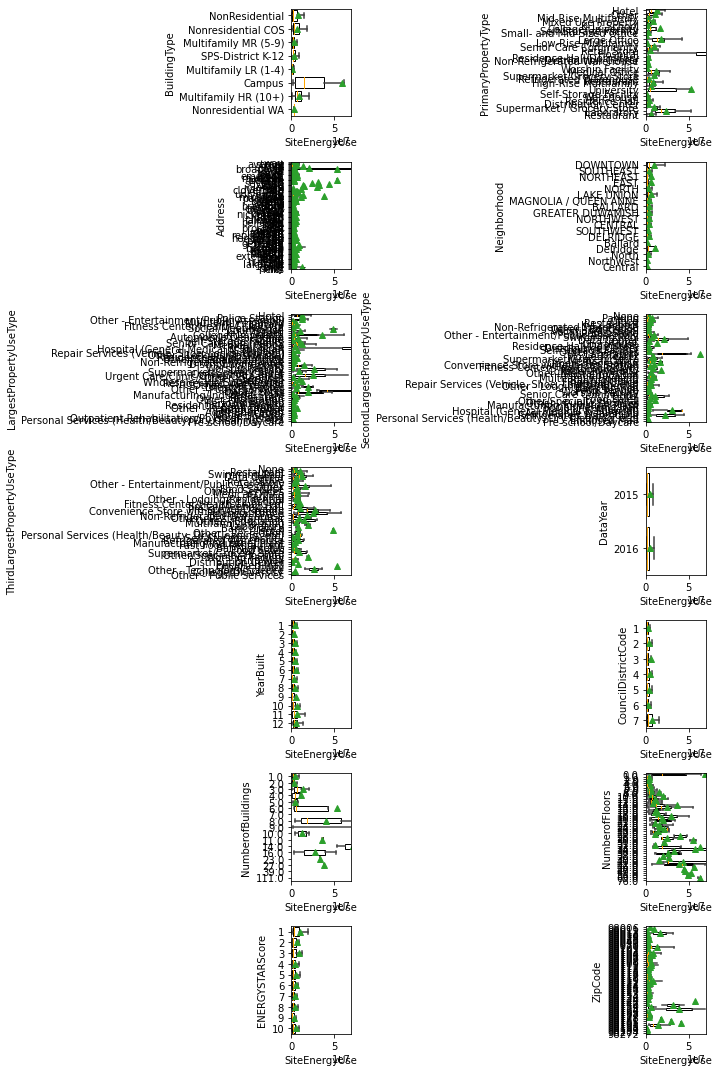

In [186]:
target = "SiteEnergyUse"
fig = plt.figure(figsize=(10, 15))
boxprops = dict(facecolor = "w", edgecolor='k', linewidth=1)
medianprops = dict(color='orange', linewidth=1)
for i, var in enumerate(categorical_features):
    ax = fig.add_subplot(7, 2, i+1)
    sns.boxplot(y=var, x=target, data=data, ax=ax, orient="h", showfliers=False, showmeans=True, 
                boxprops=boxprops, medianprops=medianprops)
    #ax.boxplot(data[[var, target]], vert=False, showfliers=False, showmeans=True)
    #make_plot(var, target, ax=ax)
    plt.tight_layout()
    ax.set_xlim([0, 7e7])
plt.show()


Création d'un nouveau modèle ne contenant que les variables catégorielles associées à plus de 5 % avec SiteEnergyUse.

In [187]:
least_correlated = df_corrSEU[df_corrSEU["eta-squared"]<0.05].index
least_correlated

Index(['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'Address', 'Neighborhood', 'ZipCode', 'CouncilDistrictCode',
       'YearBuilt', 'ENERGYSTARScore', 'DataYear'],
      dtype='object')

In [188]:
data.drop(columns=least_correlated).to_csv("./modele2.csv", index_label=False)

On va maintenant inspecter les corrélations entre les 4 prédicteurs les plus associés avec SiteEnergyUse (association $\gt$ 5%). On définit la fonction contingence qui va permettre d'afficher les tables de contingence, et le résultat de tests du chi2 sur chaque paire.

In [189]:
from scipy.stats import chi2_contingency

def contingence(Var1, Var2, df):
    X=Var1
    Y=Var2
    cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(df)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    
    
    xi_n = measure.sum().sum()
    table = measure/xi_n
    totx = table.sum(axis=0)
    toty = table.sum(axis=1)
    plt.figure(figsize=(18, 6))
    sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
    chi2, pval, dof, chi2_table = chi2_contingency(c.iloc[:-1, :-1])
    
    #plt.figure(figsize=(18, 6))
    #sns.heatmap(chi2_table, annot=chi2_table, fmt=".0f")
    print("coefficient du chi2: {:.0f}".format(chi2))
    print("p-valeur: {}".format(pval))

**1. BuildingType**

coefficient du chi2: 22956
p-valeur: 0.0


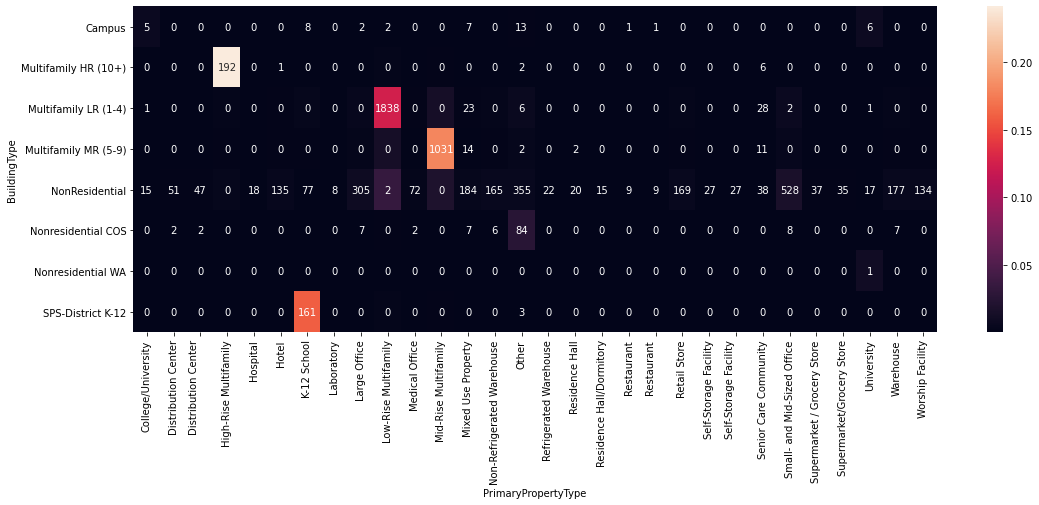

In [190]:
contingence("BuildingType", "PrimaryPropertyType", data)

coefficient du chi2: 11957
p-valeur: 0.0


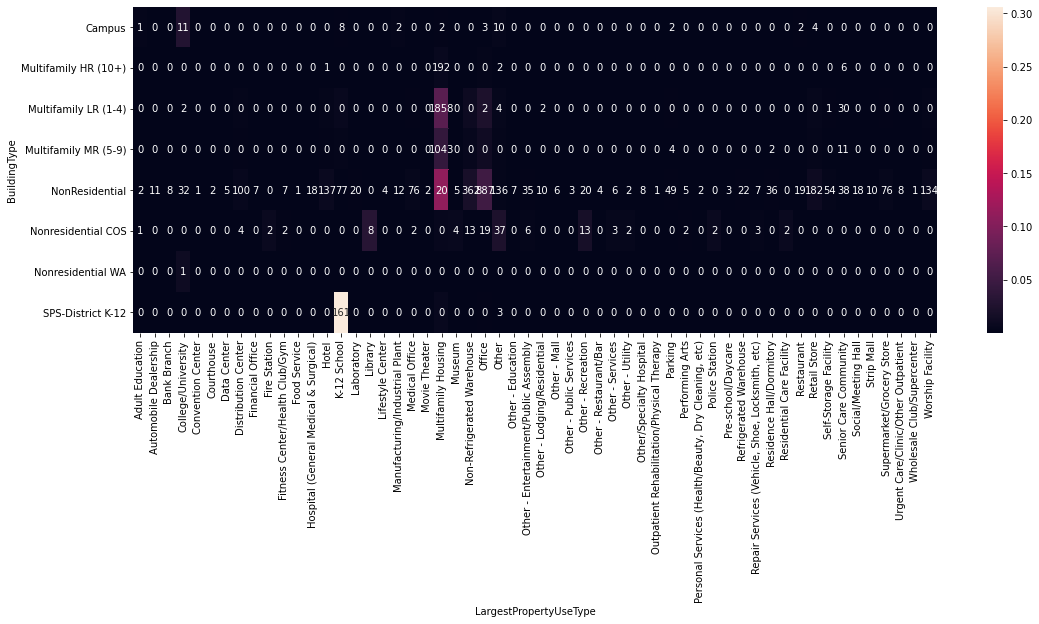

In [191]:
contingence("BuildingType", "LargestPropertyUseType", data)

coefficient du chi2: 10372
p-valeur: 0.0


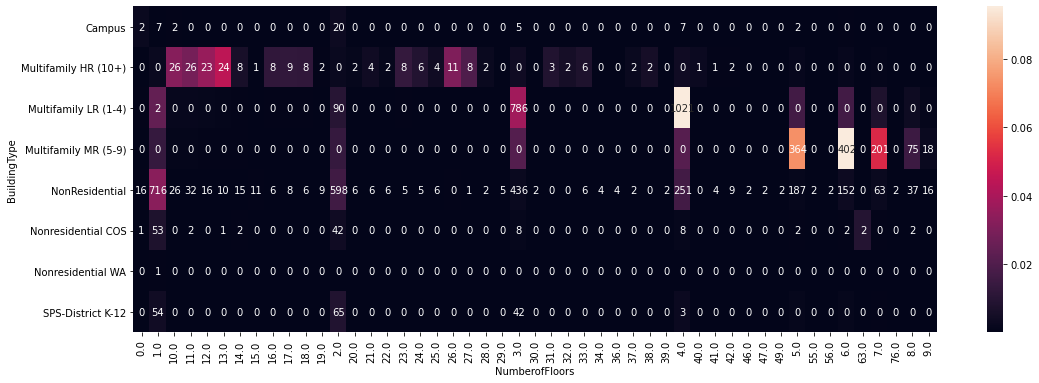

In [192]:
X="BuildingType"
Y="NumberofFloors"
data[Y] = data[Y].astype("str") # Pour éviter une erreur
contingence(X, Y, data)
data[Y] = data[Y].astype("object")

**2. PrimaryPropertyType**

coefficient du chi2: 104413
p-valeur: 0.0


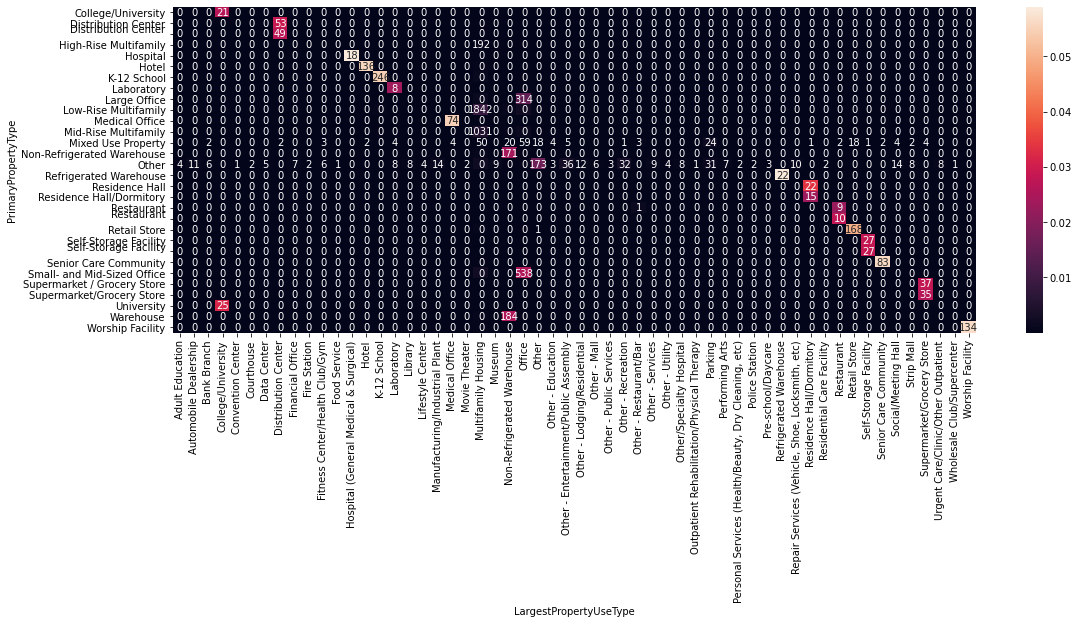

In [193]:
contingence("PrimaryPropertyType", "LargestPropertyUseType", data)

Forte redondance entre ces deux prédicteurs.

coefficient du chi2: 14420
p-valeur: 0.0


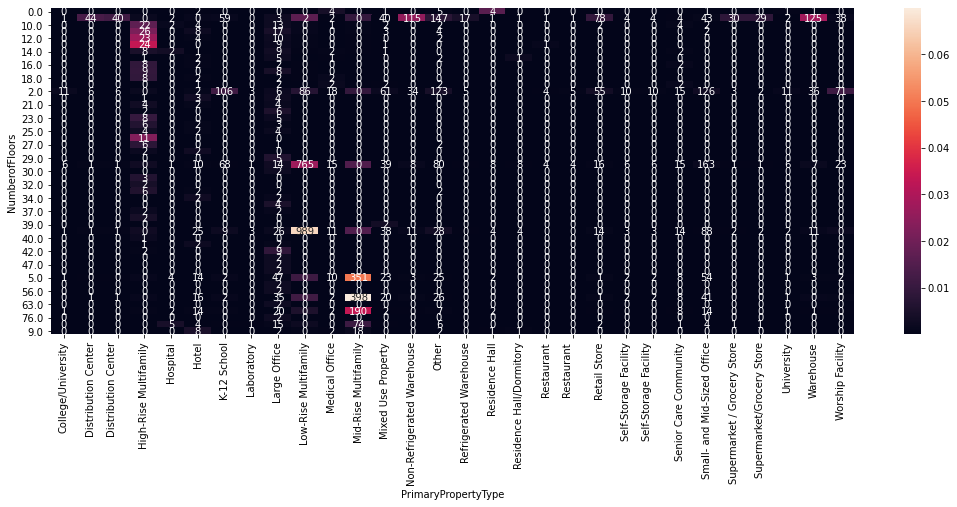

In [194]:
contingence("NumberofFloors", "PrimaryPropertyType", data)

**3. LargestPropertyUseType vs NumberofFloors**

coefficient du chi2: 7365
p-valeur: 0.0


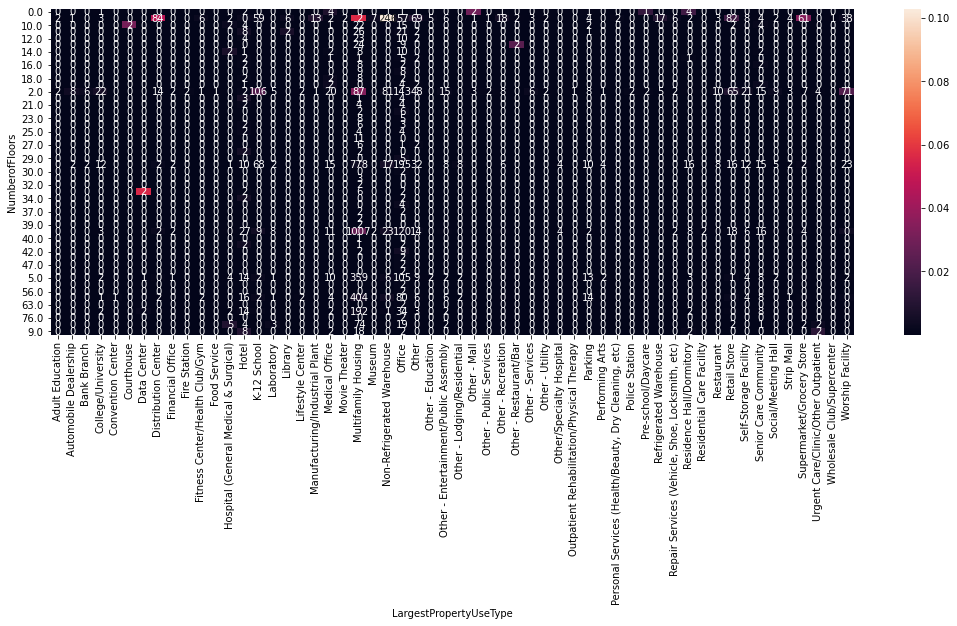

In [195]:
contingence("NumberofFloors", "LargestPropertyUseType", data)

coefficient du chi2: 2006
p-valeur: 2.6680255277095255e-266


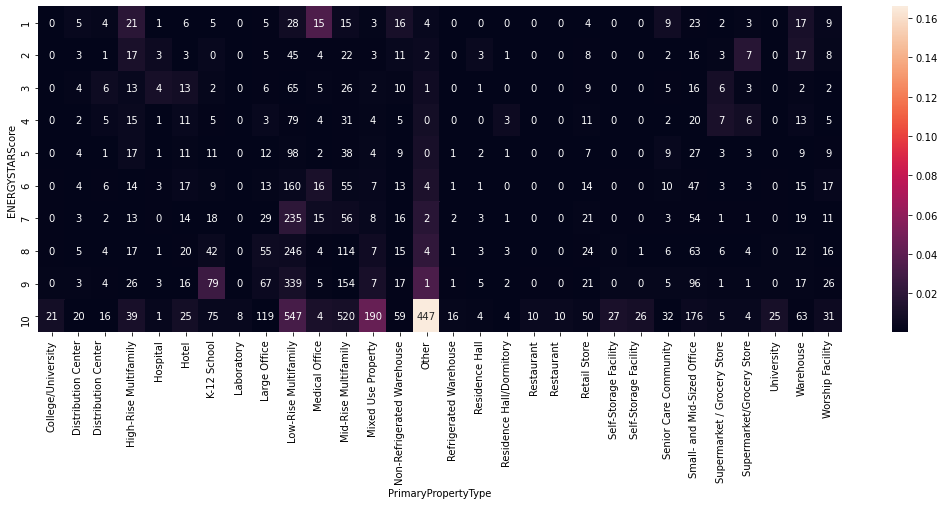

In [196]:
contingence("ENERGYSTARScore", "PrimaryPropertyType", data)

coefficient du chi2: 340
p-valeur: 2.854253650128509e-16


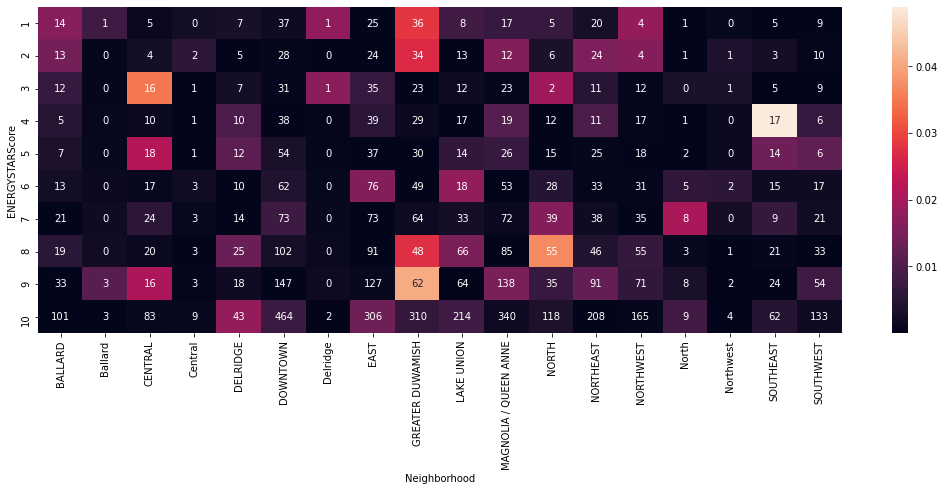

In [197]:
contingence("ENERGYSTARScore", "Neighborhood", data)

coefficient du chi2: 735
p-valeur: 2.7864333304060376e-13


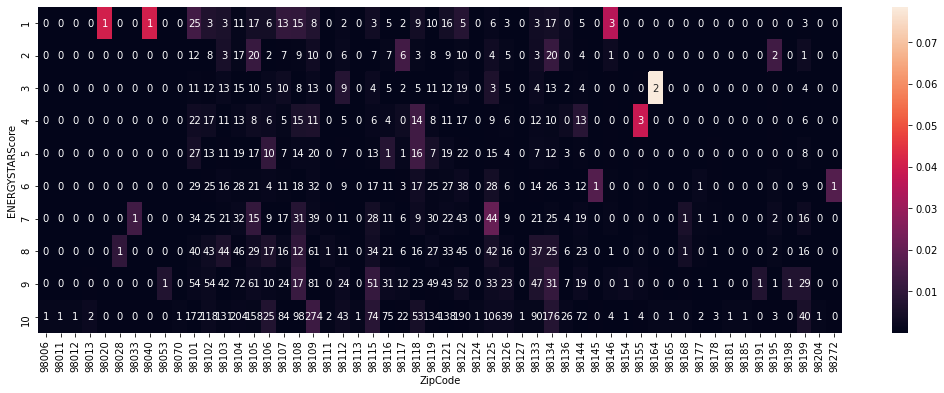

In [198]:
d = data.copy()
d.ZipCode = d.ZipCode.astype("str")
contingence("ENERGYSTARScore", "ZipCode", d)

coefficient du chi2: 366
p-valeur: 2.806825779941532e-32


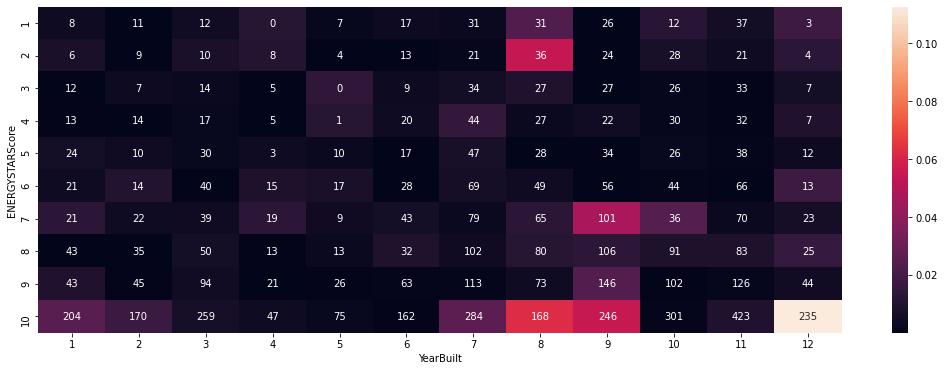

In [199]:
contingence("ENERGYSTARScore", "YearBuilt", data)